ZEYNEP PERSİL
SELİN UZUNOĞLU
BEECENG GRUBU

In [83]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


1. veri setlerini yükle
2. veris setlerinin data type bak
3. setlerin describe bak
4. eda

In [84]:
# veri setleri yükleniyor
import pandas as pd
import pandas as pd

CSAT_Survey_Data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/hacettepe-datathon-2025/CSAT_Survey_Data.csv')
Customer_Age_Data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/hacettepe-datathon-2025/Customer_Age_Data.csv')
Customer_MRR_Data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/hacettepe-datathon-2025/Customer_MRR_Data.csv')
Customer_Revenue_Data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/hacettepe-datathon-2025/Customer_Revenue_Data.csv')
Help_Ticket_Data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/hacettepe-datathon-2025/Help_Ticket_Data.csv')
Newsletter_Interaction_Data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/hacettepe-datathon-2025/Newsletter_Interaction_Data.csv')
Product_Bug_Task_Data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/hacettepe-datathon-2025/Product_Bug_Task_Data.csv')
RegionAndVertical_Data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/hacettepe-datathon-2025/RegionAndVertical_Data.csv')
StatusAndLevel_Data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/hacettepe-datathon-2025/StatusAndLevel_Data.csv')

In [85]:
CSAT_Survey_Data.head(20)
### ilk olarak gözlemlediğim bir kişi farklı zamanlarda surveye katılmış veri setinde peş peşe konmuş ama zamanları karmaşık
#onu bi sort etmeliyiz ama öyle yaparsak da peş peşe olmayabilir bi dursun
## zamanla usability ne olmuş?
## usability ile raporla yeteneklerini anlama arasında bağlantı var mı
## company rate en çok neyden etkilenmiş
## value gain rate ile understanding arasında bağlantı
## value gain rate ile quality of product arasındaki bağlantı
## kullanım sıklığı ile value gain doğru orantılı mı bağlantısı ne

Customer ID  Year  Quarter Survey Date Response Date  \
0   CRM-1516050  2022        3  2022-07-01    2022-08-26   
1   CRM-1516050  2022        3  2022-07-01    2022-09-27   
2   CRM-1470950  2022        1  2022-01-01    2022-03-25   
3   CRM-1470950  2022        3  2022-07-01    2022-09-30   
4   CRM-1470950  2022        2  2022-04-01    2022-06-23   
5   CRM-1470950  2022        1  2022-01-01    2022-03-28   
6   CRM-1470950  2022        1  2022-01-01    2022-03-28   
7   CRM-1470950  2022        3  2022-07-01    2022-08-05   
8   CRM-1526100  2022        2  2022-04-01    2022-06-06   
9   CRM-1526100  2022        3  2022-07-01    2022-09-30   
10  CRM-1526100  2022        3  2022-07-01    2022-09-27   
11  CRM-1526100  2022        2  2022-04-01    2022-06-06   
12  CRM-1506400  2022        3  2022-07-01    2022-09-27   
13  CRM-1506400  2022        3  2022-07-01    2022-09-27   
14  CRM-1430550  2022        3  2022-07-01    2022-08-04   
15  CRM-1430550  2022        3  2022-07-01    2022-09-20   
16  CRM-1430550  2022        1  2022-01-01    2022-03-01   
17  CRM-1430550  2022        1  2022-01-01    2022-03-21   
18  CRM-1430550  2022        1  2022-01-01    2022-03-01   
19  CRM-1430550  2022        1  2022-01-01    2022-03-21   

    How likely are you to recommend insider to a friend or colleague   \
0                                                  10                   
1                                                  10                   
2                                                   4                   
3                                                   6                   
4                                                  10                   
5                                                   7                   
6                                                   9                   
7                                                   8                   
8                                                  10                   
9                                                   9                   
10                                                 10                   
11                                                  7                   
12                                                  9                   
13                                                 10                   
14                                                  6                   
15                                                 10                   
16                                                  8                   
17                                                  8                   
18                                                  9                   
19                                                  9                   

    How would you rate the value you gain from our company  \
0                                                   5        
1                                                   5        
2                                                   3        
3                                                   3        
4                                                   5        
5                                                   4        
6                                                   5        
7                                                   4        
8                                                   5        
9                                                   4        
10                                                  5        
11                                                  4        
12                                                  5        
13                                                  5        
14                                                  4        
15                                                  5        
16                                                  4        
17                                                  4        
18                             

In [86]:
Customer_Age_Data.head(20) #tek başına anlamsızoldu csat ile birleştiricem
### csatta crm sutunu içerenlerin adı customer ıd ama age de CRM ID
## o sutunun adını değiştiricem ama ana age datsetinde ile değil copysinde
Customer_Age_Data_copy=Customer_Age_Data.copy()
Customer_Age_Data_copy.rename(columns={'CRM ID': 'Customer ID	'}, inplace=True)
# böyle yapınca Customer ID\t	oldu bu Sütun tab karakterlerini kaldırıcam
Customer_Age_Data_copy.columns=Customer_Age_Data_copy.columns.str.replace('\t', '')
#Customer_Age_Data_copy.columns
csat_age = pd.merge(CSAT_Survey_Data, Customer_Age_Data_copy, on='Customer ID', how='left')
csat_age .head(10)

Customer ID  Year  Quarter Survey Date Response Date  \
0  CRM-1516050  2022        3  2022-07-01    2022-08-26   
1  CRM-1516050  2022        3  2022-07-01    2022-09-27   
2  CRM-1470950  2022        1  2022-01-01    2022-03-25   
3  CRM-1470950  2022        3  2022-07-01    2022-09-30   
4  CRM-1470950  2022        2  2022-04-01    2022-06-23   
5  CRM-1470950  2022        1  2022-01-01    2022-03-28   
6  CRM-1470950  2022        1  2022-01-01    2022-03-28   
7  CRM-1470950  2022        3  2022-07-01    2022-08-05   
8  CRM-1526100  2022        2  2022-04-01    2022-06-06   
9  CRM-1526100  2022        3  2022-07-01    2022-09-30   

   How likely are you to recommend insider to a friend or colleague   \
0                                                 10                   
1                                                 10                   
2                                                  4                   
3                                                  6                   
4                                                 10                   
5                                                  7                   
6                                                  9                   
7                                                  8                   
8                                                 10                   
9                                                  9                   

   How would you rate the value you gain from our company  \
0                                                  5        
1                                                  5        
2                                                  3        
3                                                  3        
4                                                  5        
5                                                  4        
6                                                  5        
7                                                  4        
8                                                  5        
9                                                  4        

  How frequently are you using our platform  \
0                              Once a Month   
1                              Once a Month   
2                                Once a Day   
3                               Once a Week   
4                                Once a Day   
5                                Once a Day   
6                               Once a Week   
7                               Once a Week   
8                              Once a Month   
9                               Once a Week   

   Please rate the overall quality of our products  \
0                                                5   
1                                                5   
2                                                2   
3                                                4   
4                                                4   
5                                                4   
6                                                5   
7                                                4   
8                                                5   
9                                                4   

   Please rate the usability of the panel  \
0                                     5.0   
1                                     5.0   
2                                     3.0   
3                                     4.0   
4                                     3.0   
5                                     4.0   
6                                     5.0   
7                                     4.0   
8                                     5.0   
9                                     4.0   

  Please rate your understanding of our reporting capabilities in the panel  \
0  I need someone from Insider team to provide me...                          
1                               I don't use it often                          
2  I need someone from Insider team to pro

In [87]:
Customer_MRR_Data.head(20)
# burda her customer id'nın mrrsi unique mi bakıcam hepsi için bir tane mi mrr var yani?
### ama dolar işareti işi bozuyor bi typeın bakıcam önce
Customer_MRR_Data.dtypes
# mrr object typeinda biz onu inte çeviricez

Customer ID    object
MRR            object
dtype: object

In [88]:
# MRR sütunundaki dolar işaretini ve virgülleri kaldırma
Customer_MRR_Data['MRR'] = Customer_MRR_Data['MRR'].replace({'\$': '', ',': ''}, regex=True).astype(float)

# Her Customer ID için benzersiz MRR değerlerinin sayısını kontrol etme
unique_customer_mrr = Customer_MRR_Data.groupby('Customer ID')['MRR'].nunique()

unique_customer_mrr.head(100)

Customer ID
CRM-1002400    1
CRM-1005900    1
CRM-1006000    1
CRM-1010150    1
CRM-1019500    1
              ..
CRM-1438550    1
CRM-1438700    1
CRM-1440050    1
CRM-1440250    1
CRM-1441000    1
Name: MRR, Length: 100, dtype: int64

In [89]:
#Customer_MRR_Data bunu da csat_age veri setim ile birleştiricem
#MRR: Müşterinin E-corp’a aylık olarak ödediği para miktarını gösterir.
csat_age_mrr = pd.merge(csat_age, Customer_MRR_Data, on='Customer ID', how='left')
csat_age_mrr.head(10)

Customer ID  Year  Quarter Survey Date Response Date  \
0  CRM-1516050  2022        3  2022-07-01    2022-08-26   
1  CRM-1516050  2022        3  2022-07-01    2022-09-27   
2  CRM-1470950  2022        1  2022-01-01    2022-03-25   
3  CRM-1470950  2022        3  2022-07-01    2022-09-30   
4  CRM-1470950  2022        2  2022-04-01    2022-06-23   
5  CRM-1470950  2022        1  2022-01-01    2022-03-28   
6  CRM-1470950  2022        1  2022-01-01    2022-03-28   
7  CRM-1470950  2022        3  2022-07-01    2022-08-05   
8  CRM-1526100  2022        2  2022-04-01    2022-06-06   
9  CRM-1526100  2022        3  2022-07-01    2022-09-30   

   How likely are you to recommend insider to a friend or colleague   \
0                                                 10                   
1                                                 10                   
2                                                  4                   
3                                                  6                   
4                                                 10                   
5                                                  7                   
6                                                  9                   
7                                                  8                   
8                                                 10                   
9                                                  9                   

   How would you rate the value you gain from our company  \
0                                                  5        
1                                                  5        
2                                                  3        
3                                                  3        
4                                                  5        
5                                                  4        
6                                                  5        
7                                                  4        
8                                                  5        
9                                                  4        

  How frequently are you using our platform  \
0                              Once a Month   
1                              Once a Month   
2                                Once a Day   
3                               Once a Week   
4                                Once a Day   
5                                Once a Day   
6                               Once a Week   
7                               Once a Week   
8                              Once a Month   
9                               Once a Week   

   Please rate the overall quality of our products  \
0                                                5   
1                                                5   
2                                                2   
3                                                4   
4                                                4   
5                                                4   
6                                                5   
7                                                4   
8                                                5   
9                                                4   

   Please rate the usability of the panel  \
0                                     5.0   
1                                     5.0   
2                                     3.0   
3                                     4.0   
4                                     3.0   
5                                     4.0   
6                                     5.0   
7                                     4.0   
8                                     5.0   
9                                     4.0   

  Please rate your understanding of our reporting capabilities in the panel  \
0  I need someone from Insider team to provide me...                          
1                               I don't use it often                          
2  I need someone from Insider team to pro

In [90]:
Customer_Revenue_Data.head(10)
#Total Revenue: Müşterinin, E-corp ürünlerini kullanarak elde ettiği toplam gelir miktarını gösterir.
#bunu da datasetimle birleştiricem ama önce hepsi için bir değer mi var bakayım egre bir müşteri içi birde fazlaysa toplarım
# total revenue sütunundaki dolar işaretini ve virgülleri kaldırma
Customer_Revenue_Data['Total Revenue'] = Customer_Revenue_Data['Total Revenue'].replace({'\$': '', ',': ''}, regex=True).astype(float)
csat_age_mrr_revenue = pd.merge(csat_age_mrr, Customer_Revenue_Data, on='Customer ID', how='left')
### bir sutunu yanlış isimle ikiledim silicem
#csat_age_mrr_revenue=csat_age_mrr_revenue.drop("Toal Revenue",axis=1)
csat_age_mrr_revenue.head()

Customer ID  Year  Quarter Survey Date Response Date  \
0  CRM-1516050  2022        3  2022-07-01    2022-08-26   
1  CRM-1516050  2022        3  2022-07-01    2022-09-27   
2  CRM-1470950  2022        1  2022-01-01    2022-03-25   
3  CRM-1470950  2022        3  2022-07-01    2022-09-30   
4  CRM-1470950  2022        2  2022-04-01    2022-06-23   

   How likely are you to recommend insider to a friend or colleague   \
0                                                 10                   
1                                                 10                   
2                                                  4                   
3                                                  6                   
4                                                 10                   

   How would you rate the value you gain from our company  \
0                                                  5        
1                                                  5        
2                                                  3        
3                                                  3        
4                                                  5        

  How frequently are you using our platform  \
0                              Once a Month   
1                              Once a Month   
2                                Once a Day   
3                               Once a Week   
4                                Once a Day   

   Please rate the overall quality of our products  \
0                                                5   
1                                                5   
2                                                2   
3                                                4   
4                                                4   

   Please rate the usability of the panel  \
0                                     5.0   
1                                     5.0   
2                                     3.0   
3                                     4.0   
4                                     3.0   

  Please rate your understanding of our reporting capabilities in the panel  \
0  I need someone from Insider team to provide me...                          
1                               I don't use it often                          
2  I need someone from Insider team to provide me...                          
3       I tried but could not find everything I need                          
4  I need someone from Insider team to provide me...                          

   Customer Age (Months)      MRR  Total Revenue  
0                   13.0   1926.0            NaN  
1                   13.0   1926.0            NaN  
2                   22.0  14297.0       732199.0  
3                   22.0  14297.0       732199.0  
4                   22.0  14297.0       732199.0

In [91]:
Help_Ticket_Data.head()
#Help Ticket Count: Müşterinin, müşteri destek ekibinden yardım almak için oluşturduğu toplam talep sayısını gösterir.
#Help Ticket Lead Time(hours): İlgili müşteri tarafından oluşturulan taleplerin ortalama çözüm süresini gösterir.
#bu veri ile yardım isteme sayısı ile usability
#lead time ile company rate bağlantısına bakabilirim.
# ama customer birden fazla kez forma giriyor her girişinde help sayısı ve çözümü zamanla değiştimi değişmedi mi bu konu da bi bağlantı yok
#data setinde bu verilmemiş.
# bunu da eklicem datasete

Customer ID  Help Ticket Count  Help Ticket Lead Time (hours)
0  CRM-1516050                  9                            418
1  CRM-1467150                  8                            382
2  CRM-1470950                 30                            366
3  CRM-1526100                  4                           1206
4  CRM-1506400                 22                            484

In [92]:
csat_age_mrr_revenue_ticket = pd.merge(csat_age_mrr_revenue, Help_Ticket_Data, on='Customer ID', how='left')
csat_age_mrr_revenue_ticket.head()


Customer ID  Year  Quarter Survey Date Response Date  \
0  CRM-1516050  2022        3  2022-07-01    2022-08-26   
1  CRM-1516050  2022        3  2022-07-01    2022-09-27   
2  CRM-1470950  2022        1  2022-01-01    2022-03-25   
3  CRM-1470950  2022        3  2022-07-01    2022-09-30   
4  CRM-1470950  2022        2  2022-04-01    2022-06-23   

   How likely are you to recommend insider to a friend or colleague   \
0                                                 10                   
1                                                 10                   
2                                                  4                   
3                                                  6                   
4                                                 10                   

   How would you rate the value you gain from our company  \
0                                                  5        
1                                                  5        
2                                                  3        
3                                                  3        
4                                                  5        

  How frequently are you using our platform  \
0                              Once a Month   
1                              Once a Month   
2                                Once a Day   
3                               Once a Week   
4                                Once a Day   

   Please rate the overall quality of our products  \
0                                                5   
1                                                5   
2                                                2   
3                                                4   
4                                                4   

   Please rate the usability of the panel  \
0                                     5.0   
1                                     5.0   
2                                     3.0   
3                                     4.0   
4                                     3.0   

  Please rate your understanding of our reporting capabilities in the panel  \
0  I need someone from Insider team to provide me...                          
1                               I don't use it often                          
2  I need someone from Insider team to provide me...                          
3       I tried but could not find everything I need                          
4  I need someone from Insider team to provide me...                          

   Customer Age (Months)      MRR  Total Revenue  Help Ticket Count  \
0                   13.0   1926.0            NaN                9.0   
1                   13.0   1926.0            NaN                9.0   
2                   22.0  14297.0       732199.0               30.0   
3                   22.0  14297.0       732199.0               30.0   
4                   22.0  14297.0       732199.0               30.0   

   Help Ticket Lead Time (hours)  
0                          418.0  
1                          418.0  
2                          366.0  
3                          366.0  
4                          366.0

In [93]:
Newsletter_Interaction_Data.head()
# Müşterinin, E-corp tarafından gönderilen bültenlerle kaç kez etkileşime geçtiğini gösterir.
unique = Newsletter_Interaction_Data.groupby('Customer ID')['Company Newsletter Interaction Count'].nunique()
unique.head(100)


Customer ID
CRM-1010150    1
CRM-1019500    1
CRM-1043250    1
CRM-1102150    1
CRM-1102650    1
              ..
CRM-1538850    1
CRM-1538950    1
CRM-1539500    1
CRM-1541700    1
CRM-1541850    1
Name: Company Newsletter Interaction Count, Length: 100, dtype: int64

In [94]:
csat_age_mrr_revenue_ticket_interaction = pd.merge(csat_age_mrr_revenue_ticket, Newsletter_Interaction_Data, on='Customer ID', how='left')
csat_age_mrr_revenue_ticket_interaction

Customer ID  Year  Quarter Survey Date Response Date  \
0     CRM-1516050  2022        3  2022-07-01    2022-08-26   
1     CRM-1516050  2022        3  2022-07-01    2022-09-27   
2     CRM-1470950  2022        1  2022-01-01    2022-03-25   
3     CRM-1470950  2022        3  2022-07-01    2022-09-30   
4     CRM-1470950  2022        2  2022-04-01    2022-06-23   
...           ...   ...      ...         ...           ...   
1984   CRM-155450  2022        1  2022-01-01    2022-03-30   
1985   CRM-155450  2022        2  2022-04-01    2022-06-30   
1986   CRM-155450  2022        3  2022-07-01    2022-09-29   
1987  CRM-1499600  2022        1  2022-01-01    2022-03-31   
1988  CRM-1499600  2022        3  2022-07-01    2022-07-01   

      How likely are you to recommend insider to a friend or colleague   \
0                                                    10                   
1                                                    10                   
2                                                     4                   
3                                                     6                   
4                                                    10                   
...                                                 ...                   
1984                                                  7                   
1985                                                  6                   
1986                                                  7                   
1987                                                  5                   
1988                                                  5                   

      How would you rate the value you gain from our company  \
0                                                     5        
1                                                     5        
2                                                     3        
3                                                     3        
4                                                     5        
...                                                 ...        
1984                                                  3        
1985                                                  3        
1986                                                  4        
1987                                                  3        
1988                                                  4        

     How frequently are you using our platform  \
0                                 Once a Month   
1                                 Once a Month   
2                                   Once a Day   
3                                  Once a Week   
4                                   Once a Day   
...                                        ...   
1984                                Once a Day   
1985                               Once a Week   
1986                               Once a Week   
1987                                Once a Day   
1988                                Once a Day   

      Please rate the overall quality of our products  \
0                                                   5   
1                                                   5   
2                                                   2   
3                                                   4   
4                                                   4   
...                                               ...   
1984                                                3   
1985                                                4   
1986                                                4   
1987                                                3   
1988                                                4   

      Please rate the usability of the panel  \
0                                        5.0   
1                                        5.0   
2                                        3.0   
3                                        4.0   
4                                        3.0   
...              

In [95]:
Product_Bug_Task_Data.head()

Customer ID  Product Bug Task Count
0  CRM-1526150                     179
1  CRM-1477300                     150
2  CRM-1450300                      66
3   CRM-661350                     116
4  CRM-1435450                     106

In [96]:
csat_age_mrr_revenue_ticket_interaction_product = pd.merge(csat_age_mrr_revenue_ticket_interaction, Product_Bug_Task_Data, on='Customer ID', how='left')
csat_age_mrr_revenue_ticket_interaction_product.head()

Customer ID  Year  Quarter Survey Date Response Date  \
0  CRM-1516050  2022        3  2022-07-01    2022-08-26   
1  CRM-1516050  2022        3  2022-07-01    2022-08-26   
2  CRM-1516050  2022        3  2022-07-01    2022-09-27   
3  CRM-1516050  2022        3  2022-07-01    2022-09-27   
4  CRM-1470950  2022        1  2022-01-01    2022-03-25   

   How likely are you to recommend insider to a friend or colleague   \
0                                                 10                   
1                                                 10                   
2                                                 10                   
3                                                 10                   
4                                                  4                   

   How would you rate the value you gain from our company  \
0                                                  5        
1                                                  5        
2                                                  5        
3                                                  5        
4                                                  3        

  How frequently are you using our platform  \
0                              Once a Month   
1                              Once a Month   
2                              Once a Month   
3                              Once a Month   
4                                Once a Day   

   Please rate the overall quality of our products  \
0                                                5   
1                                                5   
2                                                5   
3                                                5   
4                                                2   

   Please rate the usability of the panel  \
0                                     5.0   
1                                     5.0   
2                                     5.0   
3                                     5.0   
4                                     3.0   

  Please rate your understanding of our reporting capabilities in the panel  \
0  I need someone from Insider team to provide me...                          
1  I need someone from Insider team to provide me...                          
2                               I don't use it often                          
3                               I don't use it often                          
4  I need someone from Insider team to provide me...                          

   Customer Age (Months)      MRR  Total Revenue  Help Ticket Count  \
0                   13.0   1926.0            NaN                9.0   
1                   13.0   1926.0            NaN                9.0   
2                   13.0   1926.0            NaN                9.0   
3                   13.0   1926.0            NaN                9.0   
4                   22.0  14297.0       732199.0               30.0   

   Help Ticket Lead Time (hours)  Company Newsletter Interaction Count  \
0                          418.0                                   NaN   
1                          418.0                                   NaN   
2                          418.0                                   NaN   
3                          418.0                                   NaN   
4                          366.0                                   3.0   

   Product Bug Task Count  
0                     109  
1                     112  
2                     109  
3                     112  
4                     160

In [97]:
RegionAndVertical_Data.head()
### her customer aynı  vertical ama farklı subvertical için girmiş olabilir bi bakıcam,bir kullanıcı birden fazla sektorde vardir demek oluyor
#burdaki regionlara grafikle bakıcam
#region ve vertical grafiğne bakarız

Customer ID     Region                      Vertical  \
0  CRM-1471650   Malaysia          Media and Publishing   
1  CRM-1516050     Taiwan                        Retail   
2  CRM-1087300  Australia  Transportation and Logistics   
3  CRM-1467150     Taiwan                        Retail   
4   CRM-230550     Turkey                        Retail   

                    Subvertical  
0              Content Websites  
1              Fashion Retailer  
2  Transportation and Logistics  
3                   Marketplace  
4              Fashion Retailer

<ipython-input-98-528611c77135>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=region_counts.index, y=region_counts.values, palette="viridis")


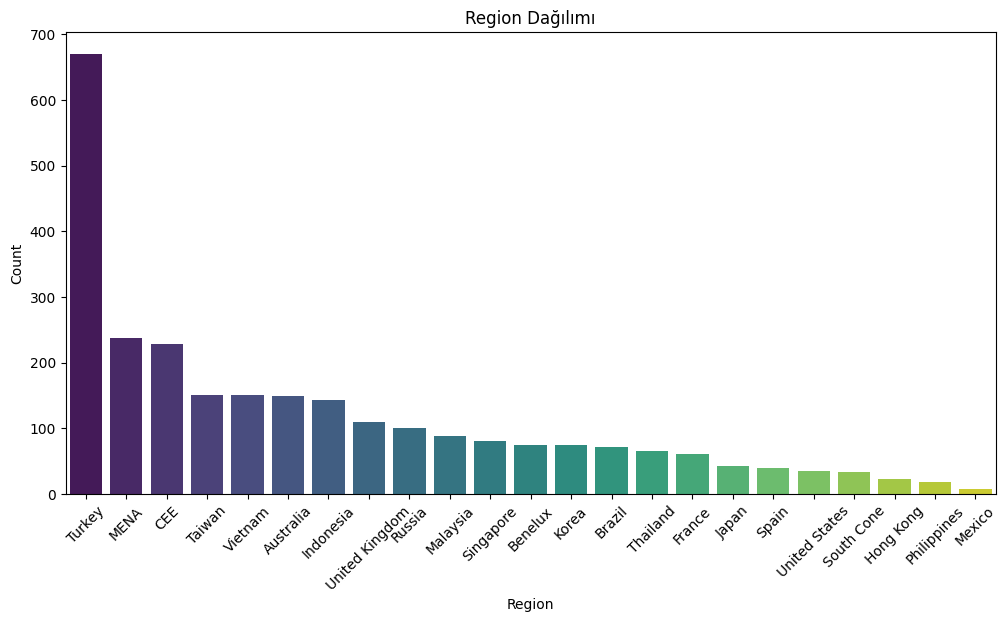

In [98]:
import matplotlib.pyplot as plt
import seaborn as sns
# Region sütunundaki her bölgenin kaç kez geçtiğini saydırdım
region_counts = RegionAndVertical_Data['Region'].value_counts()
plt.figure(figsize=(12, 6))
sns.barplot(x=region_counts.index, y=region_counts.values, palette="viridis")
# Grafik başlık ve eksen etiketleri
plt.xticks(rotation=45)  # Bölge isimleri uzun olabilir, eğik yazdıralım
plt.xlabel("Region")
plt.ylabel("Count")
plt.title("Region Dağılımı")
# Grafiği göster
plt.show()

In [99]:
#Her Vertical için kaç farklı Subvertical olduğua bakıcam
RegionAndVertical_Data.groupby("Vertical")["Subvertical"].nunique()

Vertical
Automotive                       2
B2B Commerce                     3
B2B SaaS                         1
Career and Education             3
Classifieds                      2
Comparison                       4
Consumer Electronics             2
Ebetting and Lottery             1
Fashion                          1
Finance                          5
Financial Services               3
Gaming                           1
Healthcare                       3
Internet and Telecom             5
Media and Publishing             3
Non Profit Organizations         3
Other                            8
Real Estate                      1
Restaurants and Delivery         2
Retail                          30
Transportation and Logistics     1
Travel                           5
Name: Subvertical, dtype: int64

In [100]:
#müşteri birden fazla Subverticala sahipse, o müşterinin birden fazla sektörde faaliyet gösterdiği anlamına gelir.
#2549 müşteri yalnızca 1 farklı Subvertical değerine sahip
RegionAndVertical_Data.groupby("Customer ID")["Subvertical"].nunique().value_counts()

##dikkat et subverticali olup verticali olmayanlar var
#onları doldurabiliriz ama verticali olup subverticali olanları doldurmak yanıltabilir

Subvertical
1    2549
0     102
Name: count, dtype: int64

In [101]:
RegionAndVertical_Data.groupby("Customer ID")["Vertical"].nunique().value_counts()

Vertical
1    2585
0      66
Name: count, dtype: int64

In [102]:
csat_age_mrr_revenue_ticket_interaction_product_vertical = pd.merge(csat_age_mrr_revenue_ticket_interaction_product, RegionAndVertical_Data, on='Customer ID', how='left')
csat_age_mrr_revenue_ticket_interaction_product_vertical.head()

Customer ID  Year  Quarter Survey Date Response Date  \
0  CRM-1516050  2022        3  2022-07-01    2022-08-26   
1  CRM-1516050  2022        3  2022-07-01    2022-08-26   
2  CRM-1516050  2022        3  2022-07-01    2022-09-27   
3  CRM-1516050  2022        3  2022-07-01    2022-09-27   
4  CRM-1470950  2022        1  2022-01-01    2022-03-25   

   How likely are you to recommend insider to a friend or colleague   \
0                                                 10                   
1                                                 10                   
2                                                 10                   
3                                                 10                   
4                                                  4                   

   How would you rate the value you gain from our company  \
0                                                  5        
1                                                  5        
2                                                  5        
3                                                  5        
4                                                  3        

  How frequently are you using our platform  \
0                              Once a Month   
1                              Once a Month   
2                              Once a Month   
3                              Once a Month   
4                                Once a Day   

   Please rate the overall quality of our products  \
0                                                5   
1                                                5   
2                                                5   
3                                                5   
4                                                2   

   Please rate the usability of the panel  ... Customer Age (Months)      MRR  \
0                                     5.0  ...                  13.0   1926.0   
1                                     5.0  ...                  13.0   1926.0   
2                                     5.0  ...                  13.0   1926.0   
3                                     5.0  ...                  13.0   1926.0   
4                                     3.0  ...                  22.0  14297.0   

   Total Revenue  Help Ticket Count  Help Ticket Lead Time (hours)  \
0            NaN                9.0                          418.0   
1            NaN                9.0                          418.0   
2            NaN                9.0                          418.0   
3            NaN                9.0                          418.0   
4       732199.0               30.0                          366.0   

   Company Newsletter Interaction Count  Product Bug Task Count    Region  \
0                                   NaN                     109    Taiwan   
1                                   NaN                     112    Taiwan   
2                                   NaN                     109    Taiwan   
3                                   NaN                     112    Taiwan   
4                                   3.0                     160  Thailand   

  Vertical       Subvertical  
0   Retail  Fashion Retailer  
1   Retail  Fashion Retailer  
2   Retail  Fashion Retailer  
3   Retail  Fashion Retailer  
4   Retail       Marketplace  

[5 rows x 21 columns]

In [103]:
StatusAndLevel_Data.head(10)
"""
Enterprise müşterilerinin çoğu Retained veya Onboarding gibi görünüyor.
Semi-Enterprise müşterilerinin bir kısmı Retained, bir kısmı Churn
Long-tail müşterilerinin çoğu Churn veya Onboarding
Bu durum da müşteri seviyesinin müşteri bağlılığıyla ilişkili olabileceğini gösteriyo

Enterprise müşteriler genellikle büyük ve önemli müşteriler olduğu için daha uzun süre kalma eğiliminde olabilirler
Long-tail müşteriler küçük müşteriler daha sık "Churn" olabilir,Küçük müşteriler, platformdan daha kolay ayrılabilir
Semi-Enterprise müşteriler ortada bir yerde kalıyor gibi görünüyor

"""


'\nEnterprise müşterilerinin çoğu Retained veya Onboarding gibi görünüyor.\nSemi-Enterprise müşterilerinin bir kısmı Retained, bir kısmı Churn\nLong-tail müşterilerinin çoğu Churn veya Onboarding\nBu durum da müşteri seviyesinin müşteri bağlılığıyla ilişkili olabileceğini gösteriyo\n\nEnterprise müşteriler genellikle büyük ve önemli müşteriler olduğu için daha uzun süre kalma eğiliminde olabilirler\nLong-tail müşteriler küçük müşteriler daha sık "Churn" olabilir,Küçük müşteriler, platformdan daha kolay ayrılabilir\nSemi-Enterprise müşteriler ortada bir yerde kalıyor gibi görünüyor\n\n'

In [104]:
crosstab = pd.crosstab(StatusAndLevel_Data['Customer Level'], StatusAndLevel_Data['Status'], normalize='index') * 100
print(crosstab)
"""
Churn Oranları
Long-tail müşterilerin %72.4'ü kaybedilmiş Yani küçük ölçekli müşteriler, platformda kalmaya daha az eğilimli.
Semi-Enterprise müşterilerin %43.3'ü Churn olmuş Orta ölçekli müşteriler, Long-tail kadar hızlı kaybedilmiyor ama yine de risk taşıyor.
Enterprise müşterilerin yalnızca %22'si Churn olmuş  Büyük müşteriler daha sadık görünüyor.
Büyüklük arttıkça müşteri kaybı azalıyor.
Enterprise müşteriler büyük ihtimalle daha uzun sureli duuryo hizmetten daha fazla fayda sağlıyor.

2. Onboarding Oranları
Enterprise müşterilerin %18.1'i onboarding sürecinde.
Semi-Enterprise için bu oran %11.1.
Long-tail müşterilerde onboarding oranı sadece %6.3.
Büyük müşterilerin onboarding oranı daha yüksek.
belki de Enterprise seviyesindekiler firmalara daha iyi bir müşteri alım süreci sunulıuo olabilir.

3. Retained Oranları
Enterprise müşterilerin %57.7’si retained.
Semi-Enterprise için bu oran %42.1.
Long-tail müşterilerde ise sadece %18.8.
En büyük müşteri grubunun büyük kısmı hala platformda, Long-tail müşteriler ise büyük oranda kaybediliyor.

4. Sonuç: Customer Level ve Status arasında güçlü bir ilişki var
Enterprise müşteriler sadık ve Churn oranları düşük.
Long-tail müşteriler kolayca kaybediliyor.
Semi-Enterprise müşteriler orta seviyede bir bağlılık gösteriyor.
Bu veriye dayanarak, Long-tail müşterileri elde tutmak için özel stratejiler geliştirilmesi gerektiği söylenebilir.
"""

Status               Churn  Contract Confirmation  In Opportunity Pipeline  \
Customer Level                                                               
Enterprise       22.046512               0.651163                 0.279070   
Long-tail        72.437811               0.696517                 0.497512   
Semi-Enterprise  43.379791               1.219512                 0.696864   

Status           Incomplete Deal  Onboarding       PoC   Retained  
Customer Level                                                     
Enterprise              1.023256   18.139535  0.186047  57.674419  
Long-tail               1.194030    6.368159  0.000000  18.805970  
Semi-Enterprise         1.393728   11.149826  0.000000  42.160279  


"\nChurn Oranları\nLong-tail müşterilerin %72.4'ü kaybedilmiş Yani küçük ölçekli müşteriler, platformda kalmaya daha az eğilimli.\nSemi-Enterprise müşterilerin %43.3'ü Churn olmuş Orta ölçekli müşteriler, Long-tail kadar hızlı kaybedilmiyor ama yine de risk taşıyor.\nEnterprise müşterilerin yalnızca %22'si Churn olmuş  Büyük müşteriler daha sadık görünüyor.\nBüyüklük arttıkça müşteri kaybı azalıyor. \nEnterprise müşteriler büyük ihtimalle daha uzun sureli duuryo hizmetten daha fazla fayda sağlıyor.\n\n2. Onboarding Oranları\nEnterprise müşterilerin %18.1'i onboarding sürecinde.\nSemi-Enterprise için bu oran %11.1.\nLong-tail müşterilerde onboarding oranı sadece %6.3.\nBüyük müşterilerin onboarding oranı daha yüksek.\nbelki de Enterprise seviyesindekiler firmalara daha iyi bir müşteri alım süreci sunulıuo olabilir.\n\n3. Retained Oranları\nEnterprise müşterilerin %57.7’si retained.\nSemi-Enterprise için bu oran %42.1.\nLong-tail müşterilerde ise sadece %18.8.\nEn büyük müşteri grubunun 

In [105]:
#Crosstab bize gözlemsel bir dağılım verir, ancak bu dağılımın istatistiksel olarak anlamlı olup olmadığını test etmek için Chi-Square Testi kullanılır.r?
from scipy.stats import chi2_contingency
crosstab_counts = pd.crosstab(StatusAndLevel_Data['Customer Level'], StatusAndLevel_Data['Status'])
chi2, p, dof, expected = chi2_contingency(crosstab_counts)
print(f"Chi-Square Değeri: {chi2}")
print(f"P-Değeri: {p}")
print(f"Beklenen Frekanslar: \n{expected}")
"""
Chi-Square Değeri: 554.9799855907531 ->>>gözlemlenen dağılımla beklenen dağılım arasındaki farkın büyük olduğunu ve bu farkın rastgele değil bir ilişki olduğunu gösterir.
P-Değeri: 4.290920498112093e-111 ->>0.05'ten küçük olduğu için istatistiksel olarak anlamlı bir fark olduğunu söyleyebiliriz, Customer Level ile Status arasında anlamlı bir ilişki olduğunu gösteriyor.

Customer Level ile Status arasında anlamlı bir ilişki vardır.
müşteri seviyesi değiştikçe durumların da farklılaştığını söyleyebiliriz.
long-tail müşterilerinin daha yüksek Churn oranına sahip olduğu,
Enterprise müşterilerinin ise daha fazla Retained olduğunu gözlemleyebiliriz.
"""

Chi-Square Değeri: 554.9799855907531
P-Değeri: 4.290920498112093e-111
Beklenen Frekanslar: 
[[4.91729465e+02 8.50602864e+00 4.86058779e+00 1.25565185e+01
  1.30830821e+02 8.10097965e-01 4.25706481e+02]
 [4.59709872e+02 7.95214770e+00 4.54408440e+00 1.17388847e+01
  1.22311605e+02 7.57347400e-01 3.97986059e+02]
 [2.62560663e+02 4.54182366e+00 2.59532781e+00 6.70459683e+00
  6.98575735e+01 4.32554635e-01 2.27307460e+02]]


"\nChi-Square Değeri: 554.9799855907531 ->>>gözlemlenen dağılımla beklenen dağılım arasındaki farkın büyük olduğunu ve bu farkın rastgele değil bir ilişki olduğunu gösterir.\nP-Değeri: 4.290920498112093e-111 ->>0.05'ten küçük olduğu için istatistiksel olarak anlamlı bir fark olduğunu söyleyebiliriz, Customer Level ile Status arasında anlamlı bir ilişki olduğunu gösteriyor.\n\nCustomer Level ile Status arasında anlamlı bir ilişki vardır.\nmüşteri seviyesi değiştikçe durumların da farklılaştığını söyleyebiliriz.\nlong-tail müşterilerinin daha yüksek Churn oranına sahip olduğu, \nEnterprise müşterilerinin ise daha fazla Retained olduğunu gözlemleyebiliriz.\n"

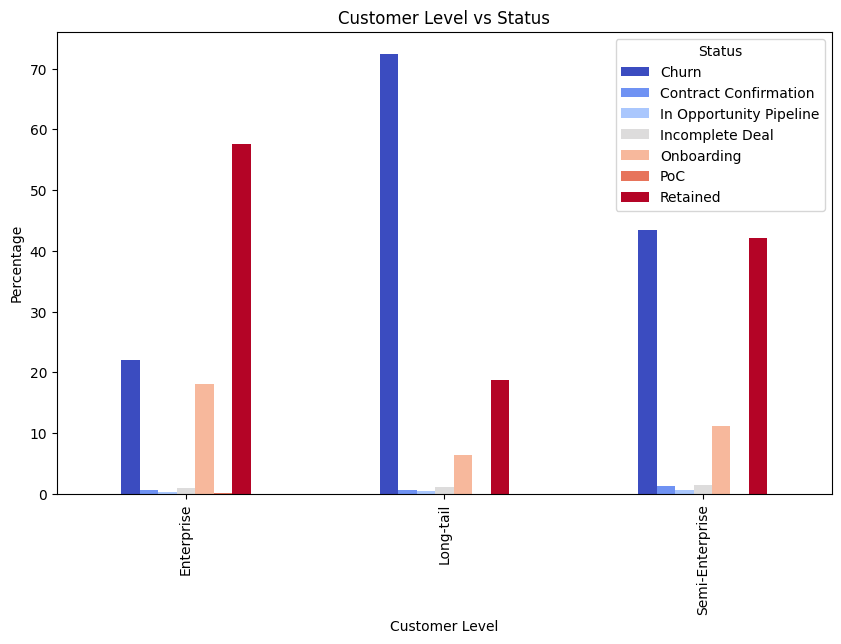

'\nenterprise retained\nsemi-enterprise churn ve hemen hemen retained\nlong-tail churn\n'

In [106]:
crosstab.plot(kind="bar", figsize=(10, 6), colormap="coolwarm")

plt.title("Customer Level vs Status")
plt.xlabel("Customer Level")
plt.ylabel("Percentage")
plt.legend(title="Status", bbox_to_anchor=(1, 1))
plt.show()

"""
enterprise retained
semi-enterprise churn ve hemen hemen retained
long-tail churn
"""


In [107]:
StatusAndLevel_Data.groupby("Customer ID")["Status"].nunique()

Customer ID
CRM-1002400    1
CRM-1005900    1
CRM-1006000    1
CRM-1010150    1
CRM-1011600    1
              ..
CRM-997700     1
CRM-998500     1
CRM-998550     1
CRM-998800     1
CRM-999900     1
Name: Status, Length: 2651, dtype: int64

In [108]:
#status türü kaç tane
StatusAndLevel_Data["Status"].unique()

array(['Onboarding', 'Churn', 'Retained', 'Contract Confirmation',
       'Incomplete Deal', 'In Opportunity Pipeline', 'PoC'], dtype=object)

In [109]:
csat_age_mrr_revenue_ticket_interaction_product_vertical_status = pd.merge(csat_age_mrr_revenue_ticket_interaction_product_vertical,StatusAndLevel_Data, on='Customer ID', how='left')
csat_age_mrr_revenue_ticket_interaction_product_vertical_status.head()
### son olarak ismi kısaltıcam böyle hangilerini dahil ettiğimi bilmek için yapmıştım
dffinal=csat_age_mrr_revenue_ticket_interaction_product_vertical_status

# tüm veri setleri tarandı, birleştirildi.

In [110]:
dffinal.to_csv("/content/dffinal.csv", index=False)


In [111]:
c=dffinal.copy()
c

Customer ID  Year  Quarter Survey Date Response Date  \
0     CRM-1516050  2022        3  2022-07-01    2022-08-26   
1     CRM-1516050  2022        3  2022-07-01    2022-08-26   
2     CRM-1516050  2022        3  2022-07-01    2022-09-27   
3     CRM-1516050  2022        3  2022-07-01    2022-09-27   
4     CRM-1470950  2022        1  2022-01-01    2022-03-25   
...           ...   ...      ...         ...           ...   
8490   CRM-155450  2022        3  2022-07-01    2022-09-29   
8491  CRM-1499600  2022        1  2022-01-01    2022-03-31   
8492  CRM-1499600  2022        1  2022-01-01    2022-03-31   
8493  CRM-1499600  2022        3  2022-07-01    2022-07-01   
8494  CRM-1499600  2022        3  2022-07-01    2022-07-01   

      How likely are you to recommend insider to a friend or colleague   \
0                                                    10                   
1                                                    10                   
2                                                    10                   
3                                                    10                   
4                                                     4                   
...                                                 ...                   
8490                                                  7                   
8491                                                  5                   
8492                                                  5                   
8493                                                  5                   
8494                                                  5                   

      How would you rate the value you gain from our company  \
0                                                     5        
1                                                     5        
2                                                     5        
3                                                     5        
4                                                     3        
...                                                 ...        
8490                                                  4        
8491                                                  3        
8492                                                  3        
8493                                                  4        
8494                                                  4        

     How frequently are you using our platform  \
0                                 Once a Month   
1                                 Once a Month   
2                                 Once a Month   
3                                 Once a Month   
4                                   Once a Day   
...                                        ...   
8490                               Once a Week   
8491                                Once a Day   
8492                                Once a Day   
8493                                Once a Day   
8494                                Once a Day   

      Please rate the overall quality of our products  \
0                                                   5   
1                                                   5   
2                                                   5   
3                                                   5   
4                                                   2   
...                                               ...   
8490                                                4   
8491                                                3   
8492                                                3   
8493                                                4   
8494                                                4   

      Please rate the usability of the panel  ... Total Revenue  \
0                                        5.0  ...           NaN   
1                                        5.0  ...           NaN   
2                                        5.0  ...           NaN   
3                                    

EDA İÇİN EKSİK VERİLERİ NASIL DOLDURUCAM BAKICAM

In [112]:
toplam_satir = c.shape[0]
print(f"Toplam Satır Sayısı: {toplam_satir}")


Toplam Satır Sayısı: 8495


In [113]:
#kategorik verileri sayısal veri yapıcam How frequently are you using our platform ile basladım
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
c['How frequently are you using our platform'] = label_encoder.fit_transform(c['How frequently are you using our platform'])
c['How frequently are you using our platform'].head()

unique_values = c['How frequently are you using our platform'].nunique()
#unique_values 4 dedi
label_encoder.classes_


array(['Once a Day', 'Once a Month', 'Once a Week', nan], dtype=object)

In [114]:
value_for_1 = label_encoder.classes_[3]
print(value_for_1)
#0 day  1month

nan


In [117]:
## Tarih sütunlarını datetime formatına dönüştürüp zamanlama bakıcam
c['Survey Date'] = pd.to_datetime(c['Survey Date'])
c['Response Date'] = pd.to_datetime(c['Response Date'])
c['Response Time'] = (c['Response Date'] - c['Survey Date']).dt.days
k=c.copy() ### bunu sonrada ekledim sonda lazım oluck
c.head()
# bunlar üzerinde değilde response time üzerinde çalısabilirim ve bunları corelasyon kurarken zorlanmamak için atıcam
c.drop(columns=['Survey Date'], inplace=True)
c.drop(columns=['Response Date'], inplace=True)

KeyError: 'Survey Date'

In [ ]:
"""
Please rate your understanding of our reporting capabilities in the panel" sütunundaki verilerden duygu analizi çıkarıcam
korelasyon bakabilmem de de işe yarayabilir
"""
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import pandas as pd
import nltk
nltk.download('vader_lexicon')
# VADER analizörünü başlat
sid = SentimentIntensityAnalyzer()
# Duygu skorlarını hesapla
c['Sentiment'] = c['Please rate your understanding of our reporting capabilities in the panel'].apply(lambda x: sid.polarity_scores(str(x))['compound'])

# 'Sentiment' sütununda duygu skoru (-1 ile 1 arasında)
# -1 = çok negatif, 0 = nötr, 1 = çok pozitif
# burdan sonra elde ettiğim sentiment kısmı ile devam edicem yeni bi copya ile please rate your understanti çıkarıcam
# "Sentiment" sütununu ilgili panel sütunu ile doldur
c1=c.copy()
c1.drop(columns=['Please rate your understanding of our reporting capabilities in the panel'], inplace=True)
# "Sentiment" sütununun ismini değiştirme
c1.rename(columns={'Sentiment': 'Sentiment:Please rate our cab'}, inplace=True)




In [ ]:
""""
Total Revenue değerini doldurucam
Customer Level Müşteri tipi farklılıkları gelirleri etkiler.
Status Müşteri durumu da gelir profillerini etkileyebilir.
yani bundan önce region, status vs doldurulmalı
ama hangilerinin total revenue ile ilişkisi var korelasyon ile bakıcam
SONRADAN DİĞER SUTUNLAR VE TOTAL REVENUE İLİŞKİSİNE BAKICAM
"""
c1[['Region', 'Customer Level', 'Status','Subvertical']].isnull().sum()
## total revenue için bu saturdaki nanlar dolmalı ya da silinmeli regio ,customer level status için nan 10 tane çok küçük silicem
#sub için 59 bi bakıcam

In [ ]:
c1 = c1.dropna(subset=['Region', 'Customer Level', 'Status'])

In [ ]:
c1[['Region', 'Customer Level', 'Status', 'Subvertical']].isnull().sum()

In [203]:
#subverticalleri değilde subverticala göre verticallari doldurabilirim
# Subvertical ve Vertical arasındaki ilişkiyi görmek için subvertical_vertical_relation dictionary olarak tanımlandı
#her Subvertical için en yaygın Vertical değerini içerir
c1 = c1.copy()
#ynin bir kopyası üzerinde işlem yapmazsak .apply() fonksiyonu çalışsa da aslında değişiklik orijinal dataFrame yansımıyo.
subvertical_vertical_relation = c1.groupby('Subvertical')['Vertical'].agg(lambda x: x.mode()[0] if not x.mode().empty else 'Unknown')
# Eksik Vertical değerlerini en yaygın ilişki ile  doldurmak için
c1.loc[:, 'Vertical'] = c1.apply(
    lambda row: subvertical_vertical_relation.get(row['Subvertical'], 'Unknown')
    if pd.isna(row['Vertical'])
    else row['Vertical'], axis=1
)

In [205]:
#her vertical için en yaygın subertical değerini içerir
subvertical_vertical_relation = c1.groupby('Vertical')['Subvertical'].agg(lambda x: x.mode()[0] if not x.mode().empty else 'Unknown')
subvertical_vertical_relation
"""
	Subvertical
Vertical
Automotive	Automotive
B2B Commerce	B2B Commerce
Career and Education	Education and Universities
Classifieds	Classifieds
Comparison	Restaurants and Delivery
Consumer Electronics	Other
Fashion	Fashion Retailer
Finance	Banking
Gaming	Gaming
Healthcare	Hospital and Dentistry
Internet and Telecom	Internet and Telecom
Media and Publishing	Content Websites
Other	Other
Real Estate	Real Estate
Restaurants and Delivery	Restaurants and Delivery
Retail	Fashion Retailer
Transportation and Logistics	Transportation and Logistics
Travel	Airlines and Airports

"""

Vertical
Automotive                                        Automotive
B2B Commerce                                    B2B Commerce
Career and Education              Education and Universities
Classifieds                                      Classifieds
Comparison                          Restaurants and Delivery
Consumer Electronics                                   Other
Fashion                                     Fashion Retailer
Finance                                              Banking
Gaming                                                Gaming
Healthcare                            Hospital and Dentistry
Internet and Telecom                    Internet and Telecom
Media and Publishing                        Content Websites
Other                                                  Other
Real Estate                                      Real Estate
Restaurants and Delivery            Restaurants and Delivery
Retail                                      Fashion Retailer
Transportation and Logistics    Transportation and Logistics
Travel                                 Airlines and Airports
Name: Subvertical, dtype: object

In [ ]:
#c1['Vertical'].isnull().sum() ## 0 çıktı bide unknown kaç tane yazdırmışım ona bakıcam
unknown_count = c1['Vertical'].eq('Unknown').sum()
print(f"'Unknown' değeri sayısı: {unknown_count}") # 2 tane satıra unknown yazdırmış başarılı.


In [ ]:
# subvertical için belirli strateji geliştiremedim silebilirim unknown ile doldurabilirim ya da  verticalin mod değer ile doldurabilirim ya da silicem
c1 = c1.dropna(subset=['Subvertical'])

In [ ]:
toplam_satir = c1.shape[0]
print(f"Toplam Satır Sayısı: {toplam_satir}")

In [ ]:
c1.head(2)

In [ ]:
 c1.isna().sum()

In [ ]:
#Please rate the usability of the panel	303deger var bunu doldurcam
# bu değer neyle alakalı olabilir diye korelasyon baktım,
#korelasyon matrixi oluşturuyorum hep bunu kullanıcam kategorik sutunları cıkardım
##relasyon bakarken ilk 3 sutunu hesaba katmıcam
# Kategorik verileri sayısallaştır

#correlation = korelasyondf1['Help Ticket Count'].corr(korelasyondf1['Product Bug Task Count'])

c1_encoded = pd.get_dummies(c1, drop_first=True)
correlation_matrix = c1_encoded.corr()
correlation_matrix["Please rate the usability of the panel"].sort_values(ascending=False).head(50)

In [ ]:
#korelasyon sonucu
"""
Please rate the usability of the panel                               1.000000
Please rate the overall quality of our products                      0.537998
How likely are you to recommend insider to a friend or colleague     0.535265
How would you rate the value you gain from our company               0.527367
"""
# ozaman bu üç değer ile doğru orantlı derim ve nan değerleri bunların ağırlıklı ortalaması ile doldurabilirim

In [ ]:
c1["Please rate the usability of the panel"] =c["Please rate the usability of the panel"].fillna(
    c1["Please rate the overall quality of our products"] * 0.54 +
    c1["How likely are you to recommend insider to a friend or colleague "] * 0.53 +
    c1["How would you rate the value you gain from our company"] * 0.52)


In [ ]:
# Kusuratı 5 ve üzeri olanları yukarı diğerlerini aşağı yuvarla
import numpy as np
c1["Please rate the usability of the panel"] = np.where(
    c1["Please rate the usability of the panel"] % 1 >= 0.5,
    np.ceil(c1["Please rate the usability of the panel"]),
    np.floor(c1["Please rate the usability of the panel"])
)

In [ ]:
 c1_encoded.columns

In [ ]:
#How frequently are you using our platform	8 değeri var silicem geçicem
c1 = c1.dropna(subset=['How frequently are you using our platform'])

In [ ]:
c1.columns

In [ ]:
#Help Ticket Lead Time(hours): İlgili müşteri tarafından oluşturulan taleplerin ortalama çözüm süresini gösterir.
correlation_matrix = c1_encoded.corr()
#correlation_matrix["Help Ticket Count"].sort_values(ascending=False).head(100)
# böyyle anlamlı bulamadım eksilere bakıcam
help_ticket_corr = correlation_matrix["Help Ticket Count"]
filtered_corr = help_ticket_corr[help_ticket_corr < -0.1].sort_values()
filtered_corr

#correlation = c1_encoded['Help Ticket Lead Time (hours)'].corr(c1_encoded['Sentiment'])
#anlamlı ilişkiler bulamadım grafik bakıcam

In [ ]:
import scipy.stats as stats
import pylab

stats.probplot(c1["Help Ticket Count"].dropna(), dist="norm", plot=pylab)
pylab.show()


In [ ]:
#aykırı değerleri çıkarıp nanları buna göre doldurcam
### birden fazla kez run edersen grafi değişiyor cunku sureli log fonksiyonunu uygulatıyo
import numpy as np
# Log dönüşümü uygulucam veri poziitf ve saga carpık cunku
m=c1.copy()
m["Help Ticket Count"] = np.log1p(m["Help Ticket Count"])

# Yeni dağılıma tekrar bakalım
stats.probplot(m["Help Ticket Count"].dropna(), dist="norm", plot=pylab)
pylab.show()
# güzel sonuc aldım asıl veri setine de entegre edicem
c1["Help Ticket Count"] = np.log1p(c1["Help Ticket Count"])
#nan değerleri simdi medyan ile doldurcam
median_value = c1["Help Ticket Count"].median()
c1["Help Ticket Count"].fillna(median_value, inplace=True)

#Product Bug Task Count ile baplantısı var mı


In [118]:
c1.isna().sum()


Customer ID                                                             0
Year                                                                    0
Quarter                                                                 0
How likely are you to recommend insider to a friend or colleague        0
How would you rate the value you gain from our company                  0
How frequently are you using our platform                               0
Please rate the overall quality of our products                         0
Please rate the usability of the panel                                  0
Customer Age (Months)                                                   0
MRR                                                                     0
Total Revenue                                                           0
Help Ticket Count                                                       0
Help Ticket Lead Time (hours)                                           0
Company Newsletter Interaction Count                                 5620
Product Bug Task Count                                                  0
Region                                                                  0
Vertical                                                                0
Subvertical                                                             0
Status                                                                  0
Customer Level                                                          0
Response Time                                                           0
Sentiment:Please rate our cab                                           0
dtype: int64

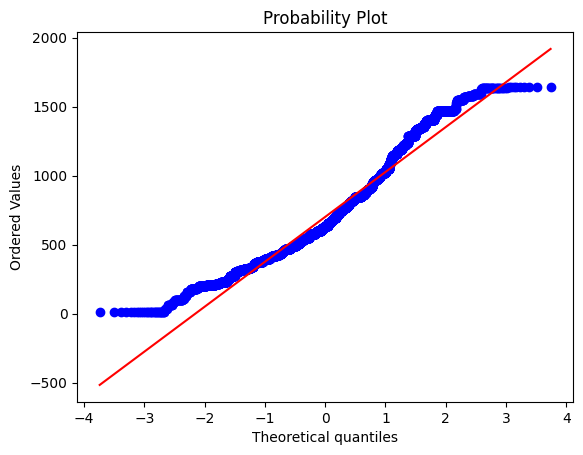

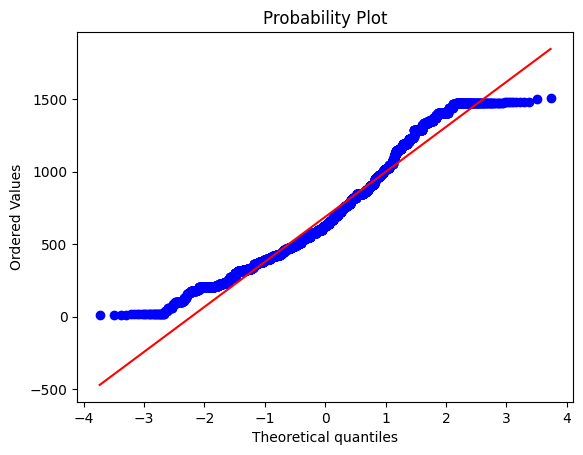

<ipython-input-119-833e068f3bdc>:26: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  c_filtered["Help Ticket Lead Time (hours)"].fillna(median_value, inplace=True)
<ipython-input-119-833e068f3bdc>:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  c_filtered["Help Ticket Lead Time (hours)"].fillna(median_value, inplace=True)


In [119]:
import scipy.stats as stats
import pylab

stats.probplot(c1["Help Ticket Lead Time (hours)"].dropna(), dist="norm", plot=pylab)
pylab.show()
import numpy as np
# Log dönüşümü uygulucam veri poziitf ve saga carpık cunku
#c1["Help Ticket Count"] = np.log1p(c1["Help Ticket Count"]) bu ise yaramadı

Q1_lead_time = c1['Help Ticket Lead Time (hours)'].quantile(0.25)
Q3_lead_time = c1['Help Ticket Lead Time (hours)'].quantile(0.75)
IQR_lead_time = Q3_lead_time - Q1_lead_time
lower_bound_lead_time = Q1_lead_time - 1.5 * IQR_lead_time
upper_bound_lead_time = Q3_lead_time + 1.5 * IQR_lead_time

# Aykırı değerleri çıkart
c_filtered = c1[(c1['Help Ticket Lead Time (hours)'] >= lower_bound_lead_time) &
               (c1['Help Ticket Lead Time (hours)'] <= upper_bound_lead_time)]
# bu sekilde guzelleşti grafik

stats.probplot(c_filtered["Help Ticket Lead Time (hours)"].dropna(), dist="norm", plot=pylab)
pylab.show()

#nan değerleri simdi medyan ile doldurcam
median_value = c_filtered["Help Ticket Lead Time (hours)"].median()
c_filtered["Help Ticket Lead Time (hours)"].fillna(median_value, inplace=True)
c1 = c_filtered.copy()




In [120]:
c1.isna().sum()

Customer ID                                                             0
Year                                                                    0
Quarter                                                                 0
How likely are you to recommend insider to a friend or colleague        0
How would you rate the value you gain from our company                  0
How frequently are you using our platform                               0
Please rate the overall quality of our products                         0
Please rate the usability of the panel                                  0
Customer Age (Months)                                                   0
MRR                                                                     0
Total Revenue                                                           0
Help Ticket Count                                                       0
Help Ticket Lead Time (hours)                                           0
Company Newsletter Interaction Count                                 5538
Product Bug Task Count                                                  0
Region                                                                  0
Vertical                                                                0
Subvertical                                                             0
Status                                                                  0
Customer Level                                                          0
Response Time                                                           0
Sentiment:Please rate our cab                                           0
dtype: int64

In [121]:
#MRRMRR: Müşterinin E-corp’a aylık olarak ödediği para miktarını gösterir.
#correlation_matrix["MRR"].sort_values(ascending=False).head()
#print(correlation_matrix)
# böyle outputta hata var
# Sadece sayısal sütunları seçicem
numeric_cols = c1.select_dtypes(include=['float64', 'int64']).columns
correlation_matrix = c1[numeric_cols].corr()

# MRR ile olan korelasyonu göstermek
print(correlation_matrix["MRR"].sort_values(ascending=False).tail())

"""
Company Newsletter Interaction Count	0.503586
Subvertical_Internet and Telecom	0.430032
Vertical_Internet and Telecom	0.430032
bundan su yorumu çıkarabilir miyim company newsletter ile ilişkili ve de vertical ve subvertical ile ilişkili
bunu için nan doldururken benzerlikten yararlanıcam knn kullanıcam

"""


Please rate the overall quality of our products          -0.033418
How would you rate the value you gain from our company   -0.051500
Help Ticket Lead Time (hours)                            -0.079999
How frequently are you using our platform                -0.179144
Year                                                           NaN
Name: MRR, dtype: float64


'\nCompany Newsletter Interaction Count\t0.503586\nSubvertical_Internet and Telecom\t0.430032\nVertical_Internet and Telecom\t0.430032\nbundan su yorumu çıkarabilir miyim company newsletter ile ilişkili ve de vertical ve subvertical ile ilişkili\nbunu için nan doldururken benzerlikten yararlanıcam knn kullanıcam\n\n'

In [122]:
# Temel istatistikleri göster
# nanda ölçeklendirme gerekir mi bakıcm
print(c1_encoded.describe())
"""
MRR, Total Revenue
Help Ticket Count  Help Ticket Lead Time arasında ölçek farkı bulunuyor.
"""


         Year      Quarter  \
count  8426.0  8426.000000   
mean   2022.0     2.061239   
std       0.0     0.834309   
min    2022.0     1.000000   
25%    2022.0     1.000000   
50%    2022.0     2.000000   
75%    2022.0     3.000000   
max    2022.0     3.000000   

       How likely are you to recommend insider to a friend or colleague   \
count                                        8426.000000                   
mean                                            8.370045                   
std                                             1.578197                   
min                                             0.000000                   
25%                                             8.000000                   
50%                                             8.000000                   
75%                                            10.000000                   
max                                            10.000000                   

       How would you rate the value you gain

'\nMRR, Total Revenue\nHelp Ticket Count  Help Ticket Lead Time arasında ölçek farkı bulunuyor.\n'

In [123]:
c1_encoded.columns

Index(['Year', 'Quarter',
       'How likely are you to recommend insider to a friend or colleague ',
       'How would you rate the value you gain from our company',
       'How frequently are you using our platform',
       'Please rate the overall quality of our products',
       'Please rate the usability of the panel', 'Customer Age (Months)',
       'MRR', 'Total Revenue',
       ...
       'Subvertical_Restaurants and Delivery', 'Subvertical_Shoes',
       'Subvertical_Sports', 'Subvertical_Supermarket Chains',
       'Subvertical_Toys', 'Subvertical_Transportation and Logistics',
       'Status_Onboarding', 'Status_Retained', 'Customer Level_Long-tail',
       'Customer Level_Semi-Enterprise'],
      dtype='object', length=732)

In [124]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.impute import KNNImputer

# Veriyi ölçeklendir
scaler = MinMaxScaler()
c_scaled = scaler.fit_transform(c1_encoded[['Total Revenue','MRR','Help Ticket Count', 'Help Ticket Lead Time (hours)', 'Company Newsletter Interaction Count', 'Response Time','Customer Age (Months)']])

c1_encoded[['Total Revenue','MRR','Help Ticket Count', 'Help Ticket Lead Time (hours)', 'Company Newsletter Interaction Count', 'Response Time','Customer Age (Months)']] = c_scaled
knn = KNNImputer(n_neighbors=5)

c1_encoded[['MRR']] = knn.fit_transform(c1_encoded[['MRR']])

c1['MRR'] = c1_encoded['MRR']


In [125]:
c1.isna().sum()

Customer ID                                                             0
Year                                                                    0
Quarter                                                                 0
How likely are you to recommend insider to a friend or colleague        0
How would you rate the value you gain from our company                  0
How frequently are you using our platform                               0
Please rate the overall quality of our products                         0
Please rate the usability of the panel                                  0
Customer Age (Months)                                                   0
MRR                                                                     0
Total Revenue                                                           0
Help Ticket Count                                                       0
Help Ticket Lead Time (hours)                                           0
Company Newsletter Interaction Count                                 5538
Product Bug Task Count                                                  0
Region                                                                  0
Vertical                                                                0
Subvertical                                                             0
Status                                                                  0
Customer Level                                                          0
Response Time                                                           0
Sentiment:Please rate our cab                                           0
dtype: int64

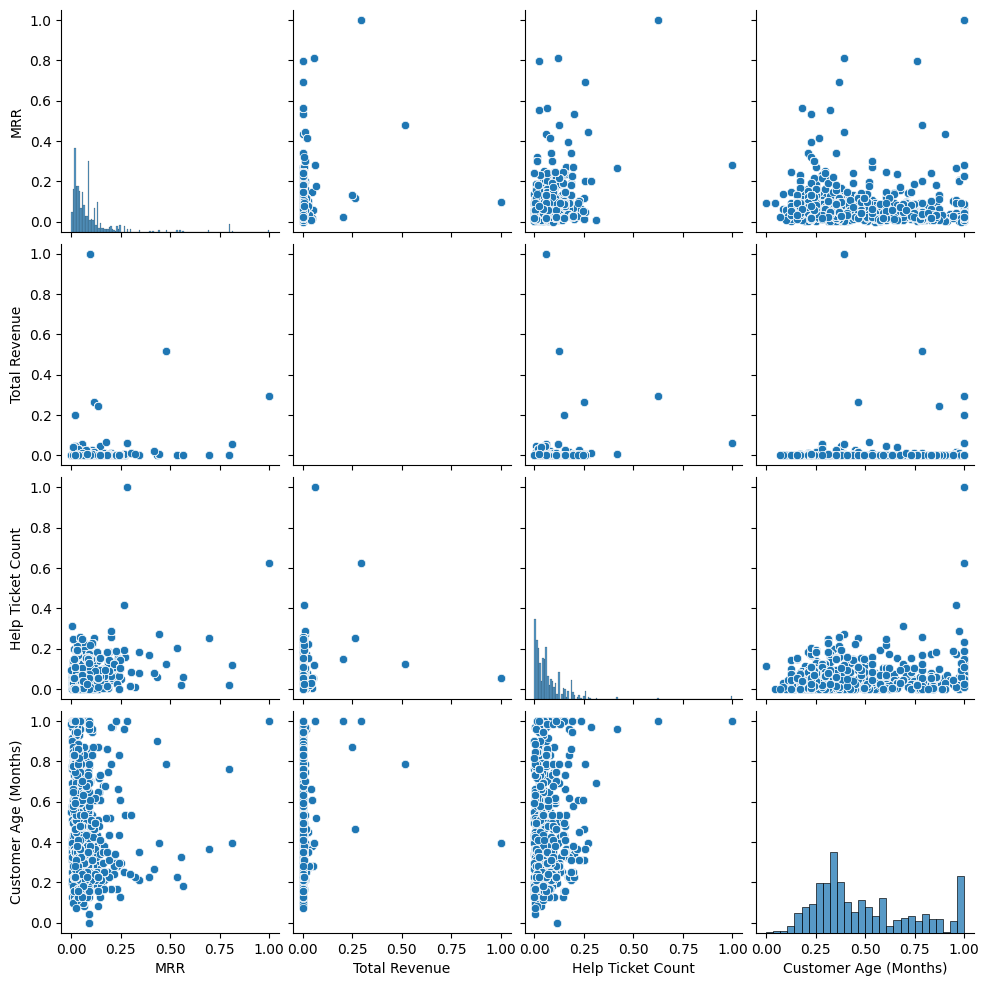

In [126]:
correlation_matrix = c1_encoded.corr()
#correlation_matrix["Total Revenue"].sort_values(ascending=False).head(50)
# Birden fazla değişkenle pairplot oluştur
sns.pairplot(c1_encoded[['MRR', 'Total Revenue', 'Help Ticket Count', 'Customer Age (Months)']])
plt.show()


In [127]:
c1['Total Revenue'] = c1.groupby(['Region', 'Customer Level', 'Status', 'Subvertical'])['Total Revenue'].transform(lambda a: a.fillna(a.median()))
c1['Total Revenue'].isna().sum()
##### tum verileri dolduramadı demekki kesimde de nanlar var

0

In [128]:
from sklearn.impute import KNNImputer
knn_imputer = KNNImputer(n_neighbors=5)
c1[['Total Revenue']] = knn_imputer.fit_transform(c1[['Total Revenue']])

In [129]:
c1['Total Revenue'].isna().sum()

0

In [130]:
### simdi tüm veri setini yorumlucaz

In [131]:
c1.head(5)

Customer ID  Year  Quarter  \
0  CRM-1516050  2022        3   
1  CRM-1516050  2022        3   
2  CRM-1516050  2022        3   
3  CRM-1516050  2022        3   
4  CRM-1470950  2022        1   

   How likely are you to recommend insider to a friend or colleague   \
0                                                 10                   
1                                                 10                   
2                                                 10                   
3                                                 10                   
4                                                  4                   

   How would you rate the value you gain from our company  \
0                                                  5        
1                                                  5        
2                                                  5        
3                                                  5        
4                                                  3        

   How frequently are you using our platform  \
0                                          1   
1                                          1   
2                                          1   
3                                          1   
4                                          0   

   Please rate the overall quality of our products  \
0                                                5   
1                                                5   
2                                                5   
3                                                5   
4                                                2   

   Please rate the usability of the panel  Customer Age (Months)       MRR  \
0                                     5.0                   13.0  0.030037   
1                                     5.0                   13.0  0.030037   
2                                     5.0                   13.0  0.030037   
3                                     5.0                   13.0  0.030037   
4                                     3.0                   22.0  0.227376   

   ...  Help Ticket Lead Time (hours)  Company Newsletter Interaction Count  \
0  ...                          418.0                                   NaN   
1  ...                          418.0                                   NaN   
2  ...                          418.0                                   NaN   
3  ...                          418.0                                   NaN   
4  ...                          366.0                                   3.0   

   Product Bug Task Count    Region  Vertical       Subvertical      Status  \
0                     109    Taiwan    Retail  Fashion Retailer  Onboarding   
1                     112    Taiwan    Retail  Fashion Retailer  Onboarding   
2                     109    Taiwan    Retail  Fashion Retailer  Onboarding   
3                     112    Taiwan    Retail  Fashion Retailer  Onboarding   
4                     160  Thailand    Retail       Marketplace    Retained   

  Customer Level Response Time Sentiment:Please rate our cab  
0      Long-tail            56                           0.0  
1      Long-tail            56                           0.0  
2      Long-tail            88                           0.0  
3      Long-tail            88                           0.0  
4     Enterprise            83                           0.0  

[5 rows x 22 columns]

<ipython-input-132-55115faf7062>:7: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.pointplot(x='How frequently are you using our platform', y='Response Time', data=grouped, color='blue', markers='o', linestyles='-', ci=None)


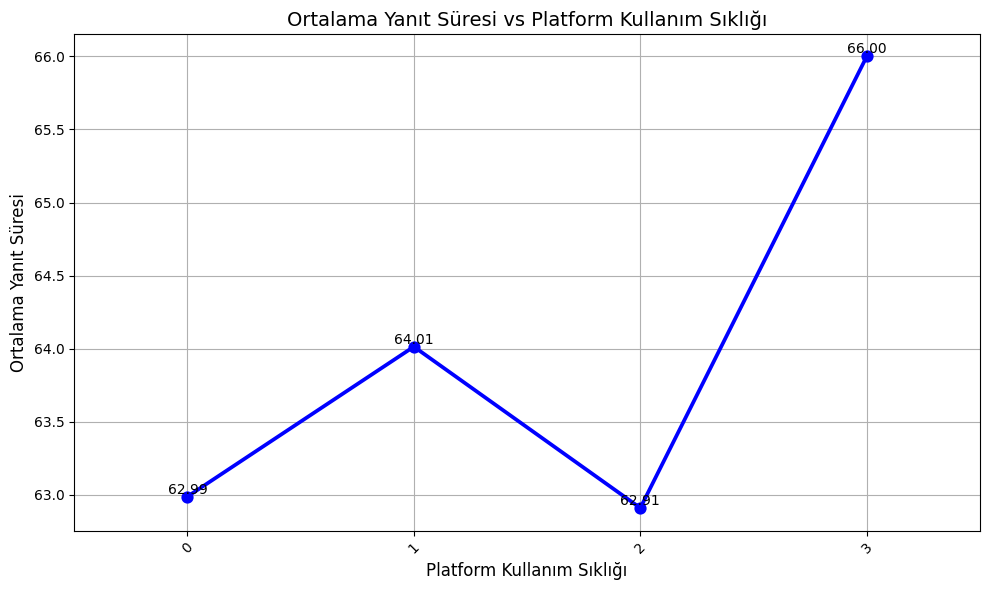

'yorum: hafta 1kez ve ayda 1 kez girenlerin response timei daha kısa ve yakıb birbirne'

In [132]:
import matplotlib.pyplot as plt
import seaborn as sns

# Kullanıcıları kullanım sıklığına göre gruplandıralım
grouped = c1.groupby('How frequently are you using our platform')['Response Time'].mean().reset_index()
plt.figure(figsize=(10, 6))
sns.pointplot(x='How frequently are you using our platform', y='Response Time', data=grouped, color='blue', markers='o', linestyles='-', ci=None)
plt.title('Ortalama Yanıt Süresi vs Platform Kullanım Sıklığı', fontsize=14)
plt.xlabel('Platform Kullanım Sıklığı', fontsize=12)
plt.ylabel('Ortalama Yanıt Süresi', fontsize=12)
plt.xticks(rotation=45)
plt.grid(True)
for i, value in enumerate(grouped['Response Time']):
    plt.text(i, value, f'{value:.2f}', ha='center', va='bottom', fontsize=10)

plt.tight_layout()
plt.show()

#0 day #1 week 3 nan olanların değerini onu göz ardı ederim
"yorum: hafta 1kez ve ayda 1 kez girenlerin response timei daha kısa ve yakıb birbirne"

<ipython-input-133-1eba2e401d58>:8: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.pointplot(x='Status', y='Response Time', data=grouped_status, color='green', markers='o', linestyles='-', ci=None)


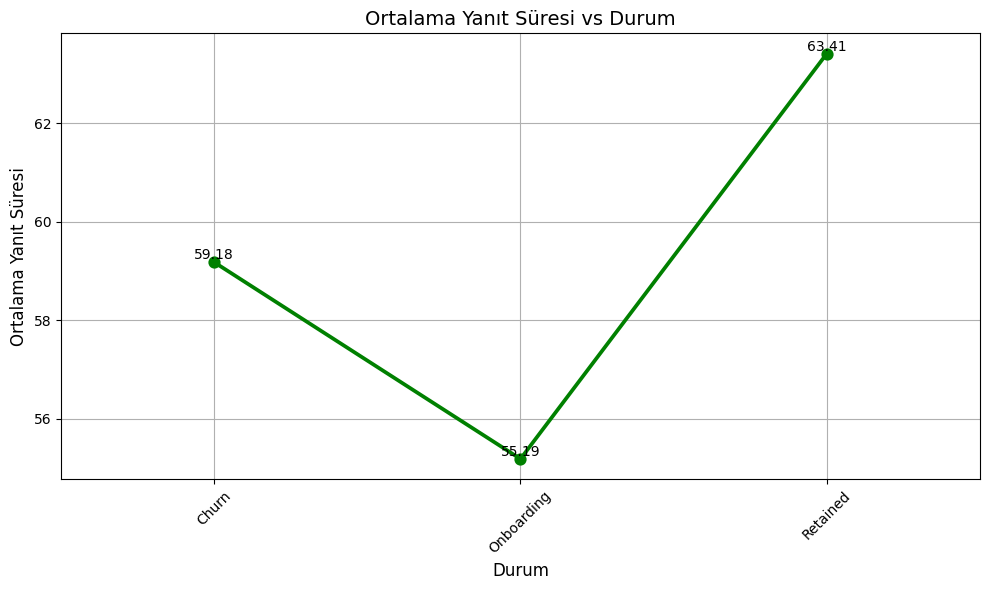

'\nyeni gelenlerin  response suresi daha kısa\nretainedlerin daha fazla\n'

In [133]:
import matplotlib.pyplot as plt
import seaborn as sns

# Kullanıcıları Status değişkenine göre gruplandıralım ve ortalama yanıt süresi hesaplayalım
grouped_status = c1.groupby('Status')['Response Time'].mean().reset_index()

plt.figure(figsize=(10, 6))
sns.pointplot(x='Status', y='Response Time', data=grouped_status, color='green', markers='o', linestyles='-', ci=None)
plt.title('Ortalama Yanıt Süresi vs Durum', fontsize=14)
plt.xlabel('Durum', fontsize=12)
plt.ylabel('Ortalama Yanıt Süresi', fontsize=12)
plt.xticks(rotation=45)
plt.grid(True)

for i, value in enumerate(grouped_status['Response Time']):
    plt.text(i, value, f'{value:.2f}', ha='center', va='bottom', fontsize=10)

plt.tight_layout()
plt.show()
"""
yeni gelenlerin  response suresi daha kısa
retainedlerin daha fazla
"""

<ipython-input-134-0ec3c1cb6488>:5: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.pointplot(x='Customer Level', y='Response Time', data=grouped_customer_level, color='orange', markers='o', linestyles='-', ci=None)


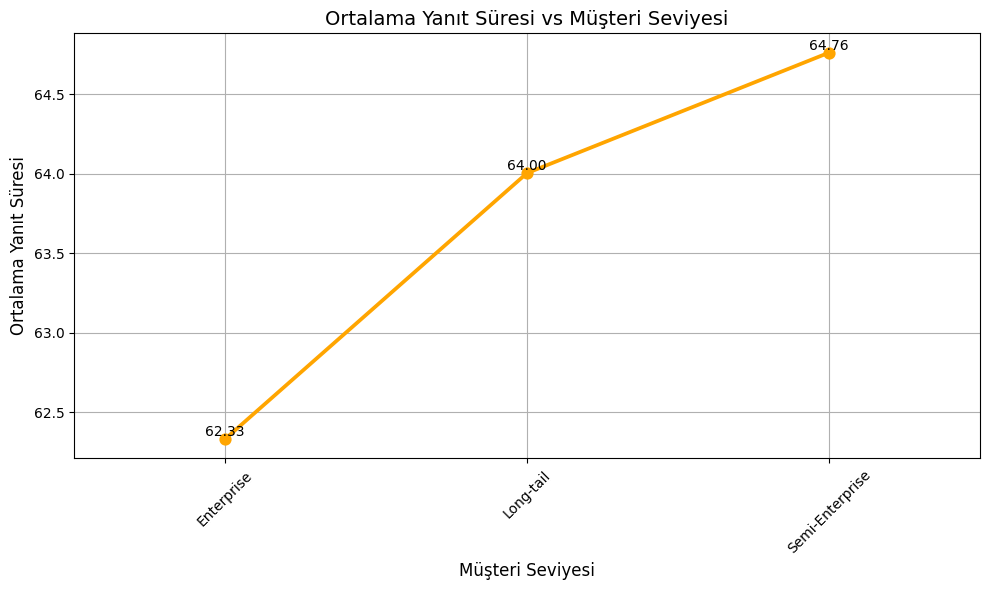

'\nenterprise daha kısa sürede yanıt veriyor\nsemi en fazla sürede\n'

In [134]:
#Customer Level değişkenine göre gruplandırıp ve ortalama yanıt süresi
grouped_customer_level = c1.groupby('Customer Level')['Response Time'].mean().reset_index()

plt.figure(figsize=(10, 6))
sns.pointplot(x='Customer Level', y='Response Time', data=grouped_customer_level, color='orange', markers='o', linestyles='-', ci=None)
plt.title('Ortalama Yanıt Süresi vs Müşteri Seviyesi', fontsize=14)
plt.xlabel('Müşteri Seviyesi', fontsize=12)
plt.ylabel('Ortalama Yanıt Süresi', fontsize=12)
plt.xticks(rotation=45)
plt.grid(True)

# Değerleri noktaların üzerinde göstermek
for i, value in enumerate(grouped_customer_level['Response Time']):
    plt.text(i, value, f'{value:.2f}', ha='center', va='bottom', fontsize=10)

plt.tight_layout()
plt.show()
"""
enterprise daha kısa sürede yanıt veriyor
semi en fazla sürede
"""

<Figure size 1200x800 with 0 Axes>

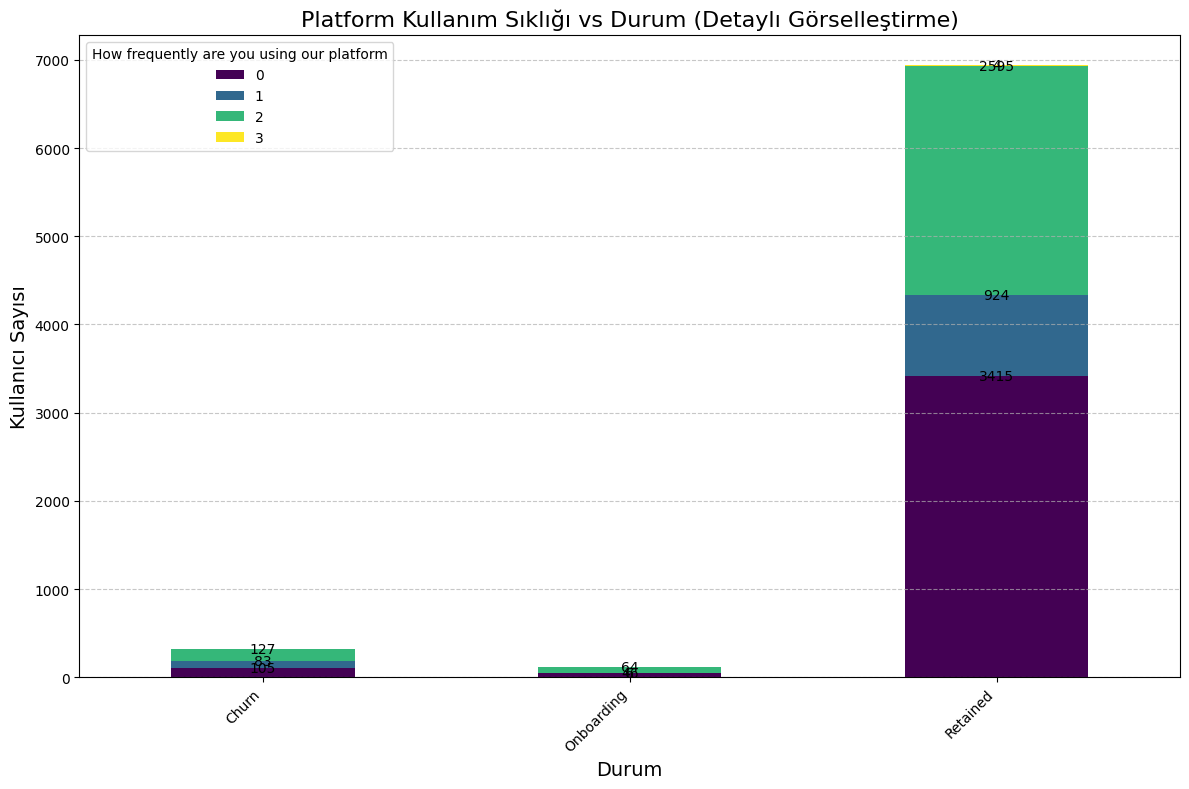

'\nretainedlarin çoğunlugu günde 1 kez kullanıyor ya\nchurnlerin çoğu ayda 1 kez\nyeni gelenlerinde çoğunlugu ayda bi kez\n\n'

In [135]:
import matplotlib.pyplot as plt
import seaborn as sns
### kusuratlı grafik çizdircem anlayamadım
# Status değişkenine göre gruplandıralım ve platform kullanım sıklığı hesaplayalım
grouped_status_usage = c1.groupby('Status')['How frequently are you using our platform'].value_counts().unstack().fillna(0)
plt.figure(figsize=(12, 8))
grouped_status_usage.plot(kind='bar', stacked=True, colormap='viridis', figsize=(12, 8))
plt.title('Platform Kullanım Sıklığı-status', fontsize=16)
plt.xlabel('Durum', fontsize=14)
plt.ylabel('Kullanıcı Sayısı', fontsize=14)

for p in plt.gca().patches:
    height = p.get_height()
    if height > 0:
        plt.text(p.get_x() + p.get_width() / 2., p.get_height() + p.get_y(), f'{height:.0f}',
                 ha="center", va="center", fontsize=10, color='black')

plt.xticks(rotation=45, ha="right")
plt.grid(True, axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

"""
retainedlarin çoğunlugu günde 1 kez kullanıyor ya
churnlerin çoğu ayda 1 kez
yeni gelenlerinde çoğunlugu ayda bi kez

"""

<Figure size 1200x800 with 0 Axes>

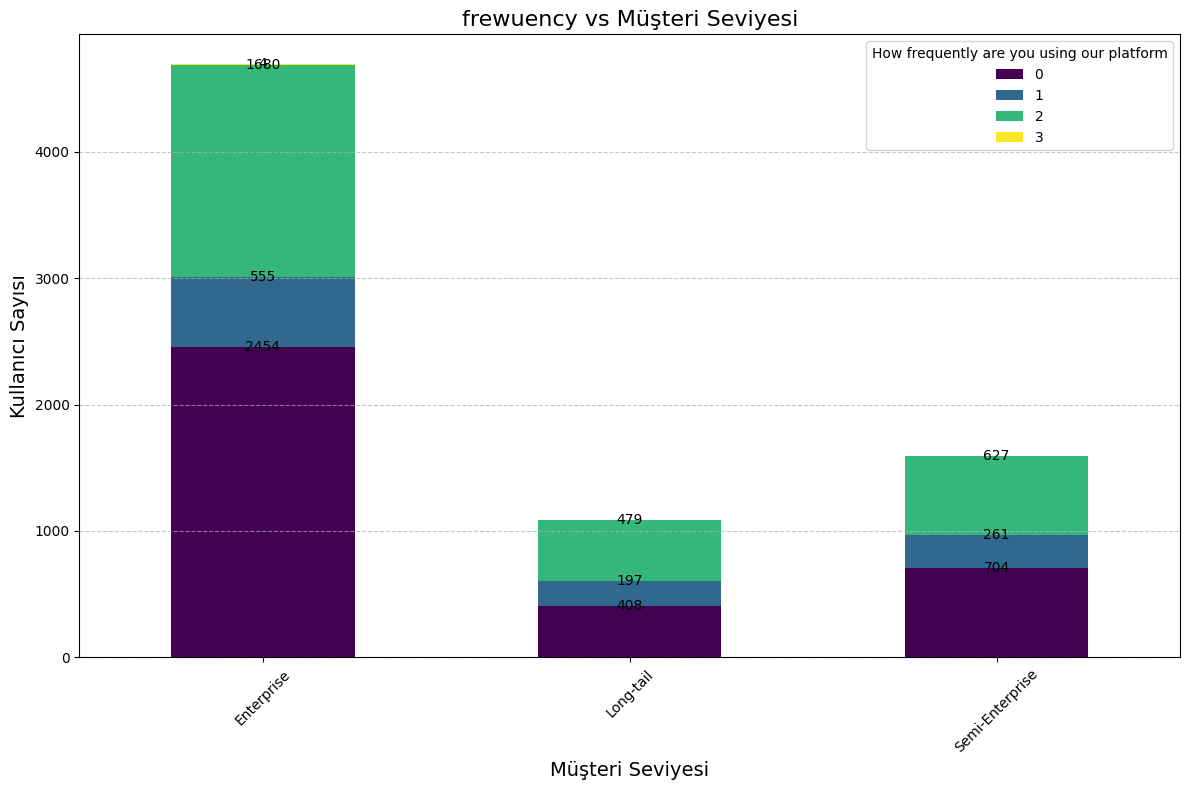

'\nenterprise genelde günde bi kez \nsemi enterprsie genedlde günde 1 kez\nlong tailda çoğunluk ayda 1kez\n'

In [136]:

import matplotlib.pyplot as plt
import seaborn as sns

# customer Levele göre gruplandıralım
grouped_customer_level_usage = c1.groupby(['Customer Level', 'How frequently are you using our platform'])['Customer ID'].count().unstack().fillna(0)

plt.figure(figsize=(12, 8))
grouped_customer_level_usage.plot(kind='bar', stacked=True, colormap='viridis', figsize=(12, 8))

plt.title('frewuency vs Müşteri Seviyesi', fontsize=16)
plt.xlabel('Müşteri Seviyesi', fontsize=14)
plt.ylabel('Kullanıcı Sayısı', fontsize=14)

for p in plt.gca().patches:
    height = p.get_height()
    if height > 0:
        plt.text(p.get_x() + p.get_width() / 2., p.get_height() + p.get_y(), f'{height:.0f}',
                 ha="center", va="center", fontsize=10, color='black')
plt.xticks(rotation=45)
plt.grid(True, axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


"""
enterprise genelde günde bi kez
semi enterprsie genedlde günde 1 kez
long tailda çoğunluk ayda 1kez
"""

<ipython-input-196-4285ae9e5cfb>:13: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_product_task_avg = c1.groupby('Age Group')['Product Bug Task Count'].mean()
<ipython-input-196-4285ae9e5cfb>:14: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_ticket_count_avg = c1.groupby('Age Group')['Help Ticket Count'].mean()
<ipython-input-196-4285ae9e5cfb>:15: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_frequency_count_

<Figure size 1400x600 with 0 Axes>

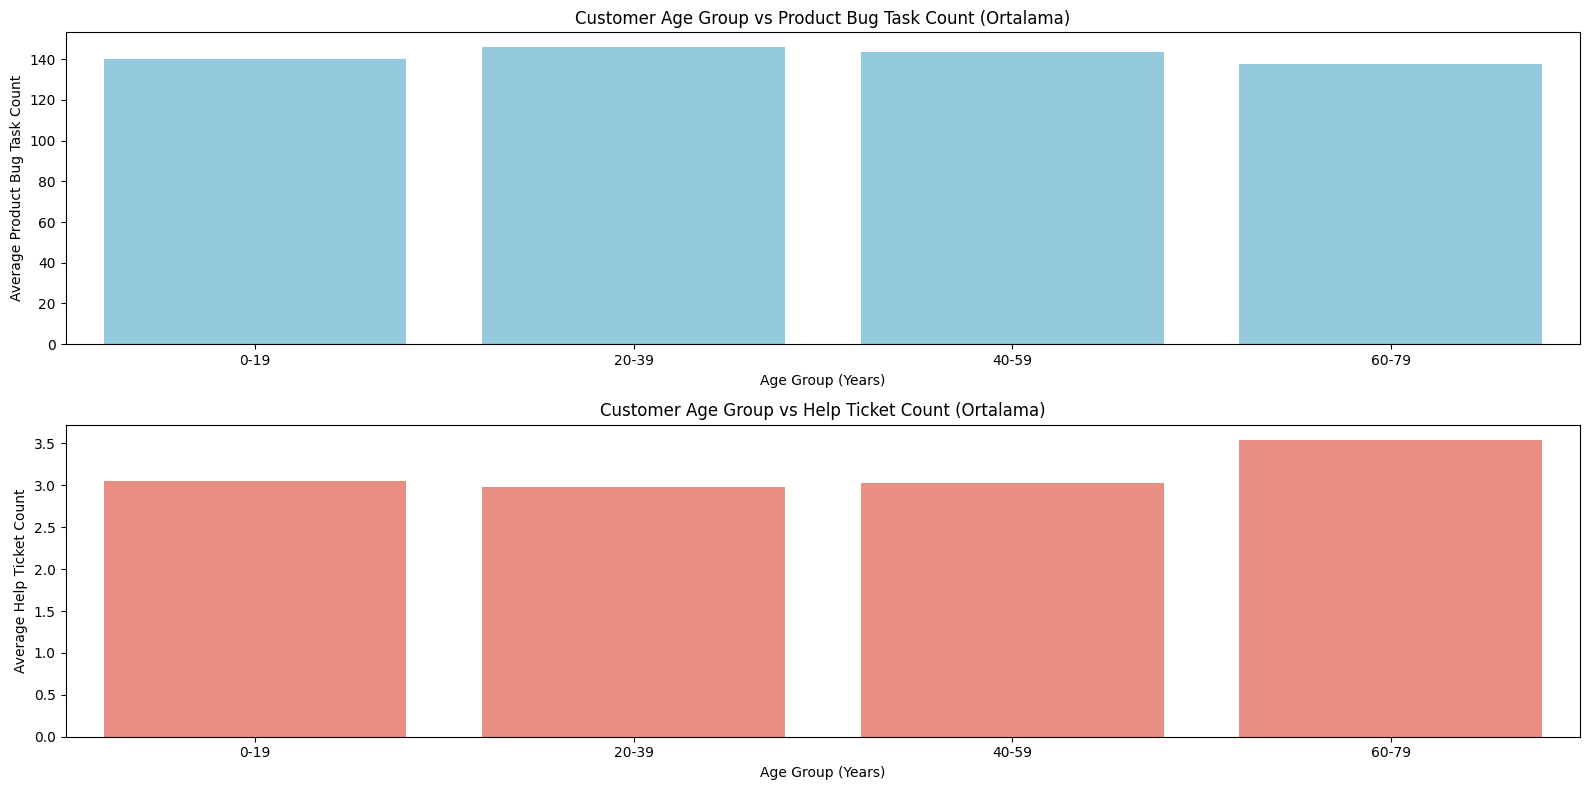

'\nyuksek yaş ortalamasında daha fazla help ticket count soz konusu ama product bug task bu yas gurubunda en az \n'

In [196]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
#customer age ile çıkarım yapıcam
# Customer Age vs Product Bug Task Count
plt.figure(figsize=(14, 6))

bins = np.arange(0,c1['Customer Age (Months)'].max() + 20, 20)  #
labels = [f'{i}-{i+19}' for i in range(0, int(c1['Customer Age (Months)'].max()), 20)]
c1['Age Group'] = pd.cut(c1['Customer Age (Months)'], bins=bins, labels=labels, right=False)

# Customer Age Group ile Product Bug Task Count ve Help Ticket Count'un ortalamalarını hesaplayalım
age_product_task_avg = c1.groupby('Age Group')['Product Bug Task Count'].mean()
age_ticket_count_avg = c1.groupby('Age Group')['Help Ticket Count'].mean()
age_frequency_count_avg = c1.groupby('Age Group')['How frequently are you using our platform'].mean()
# Grafik çizimi
plt.figure(figsize=(16, 8))

# Customer Age ile Product Bug Task Count ilişkisi
plt.subplot(2, 1, 1)
sns.barplot(x=age_product_task_avg.index, y=age_product_task_avg.values, color='skyblue')
plt.title('Customer Age Group vs Product Bug Task Count (Ortalama)')
plt.xlabel('Age Group (Years)')
plt.ylabel('Average Product Bug Task Count')

# Customer Age ile Help Ticket Count ilişkisi
plt.subplot(2, 1, 2)
sns.barplot(x=age_ticket_count_avg.index, y=age_ticket_count_avg.values, color='salmon')
plt.title('Customer Age Group vs Help Ticket Count (Ortalama)')
plt.xlabel('Age Group (Years)')
plt.ylabel('Average Help Ticket Count')

plt.tight_layout()
plt.show()
"""
yuksek yaş ortalamasında daha fazla help ticket count soz konusu ama product bug task bu yas gurubunda en az
"""
# yaşa gruplarının genel  status ve customer leveline de bakalım


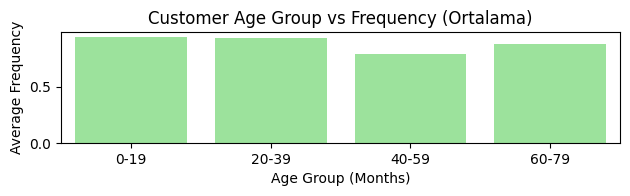

In [186]:
# Customer Age ile Frequency ilişkisi
plt.subplot(3, 1, 3)
sns.barplot(x=age_frequency_count_avg.index, y=age_frequency_count_avg.values, color='lightgreen')
plt.title('Customer Age Group vs Frequency (Ortalama)')
plt.xlabel('Age Group (Months)')
plt.ylabel('Average Frequency')
plt.tight_layout()
plt.show()
"""
ortalama platorm frwuency genç yaslarda daha yüksek 20-39

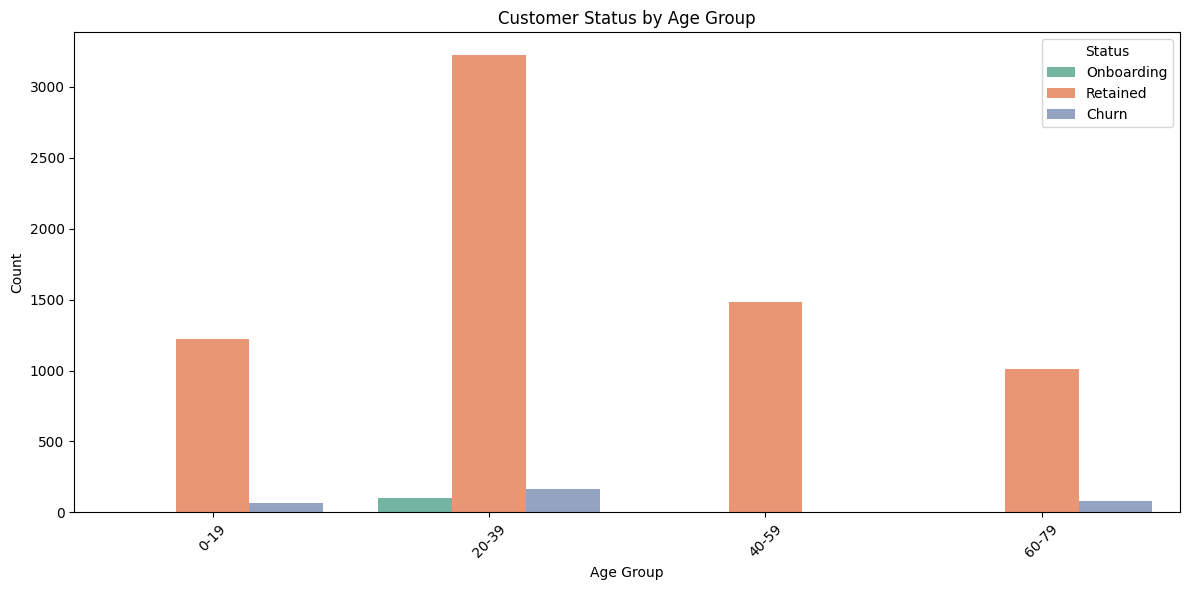

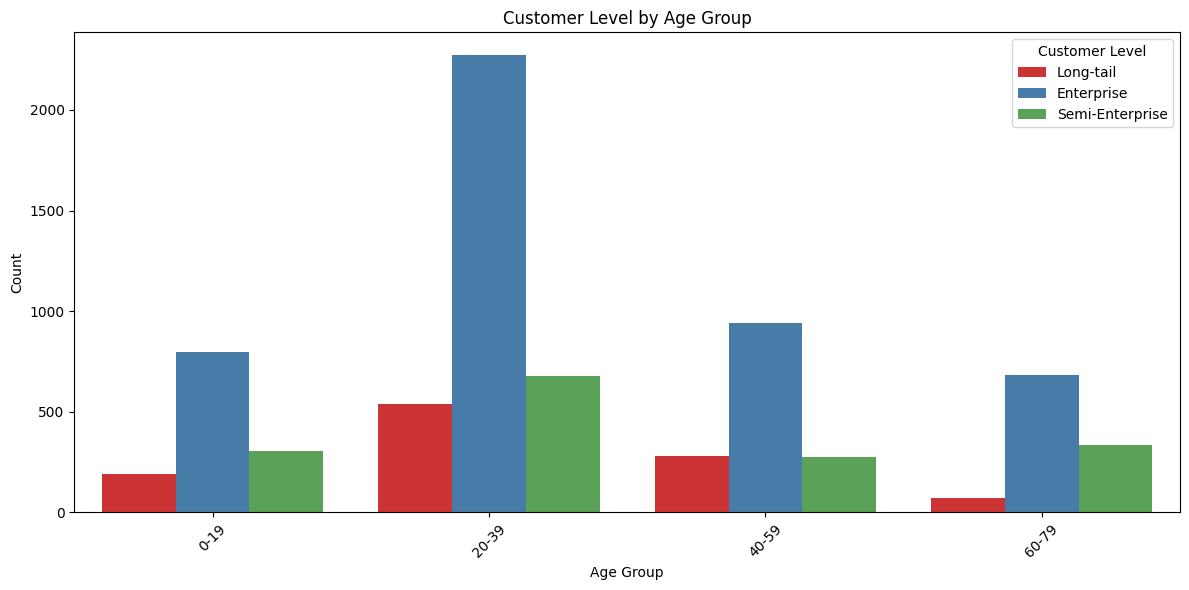

'\n\n'

In [198]:
# Customer Status'a göre yaş grubu sayısını göstermek için barplot
plt.figure(figsize=(12, 6))
sns.countplot(x='Age Group', hue='Status', data=c1, palette='Set2')
plt.title('Customer Status by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
#Customer Level ile Yaş Grubu

# Customer Level'aage
plt.figure(figsize=(12, 6))
sns.countplot(x='Age Group', hue='Customer Level', data=c1, palette='Set1')
plt.title('Customer Level by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
"""

"""

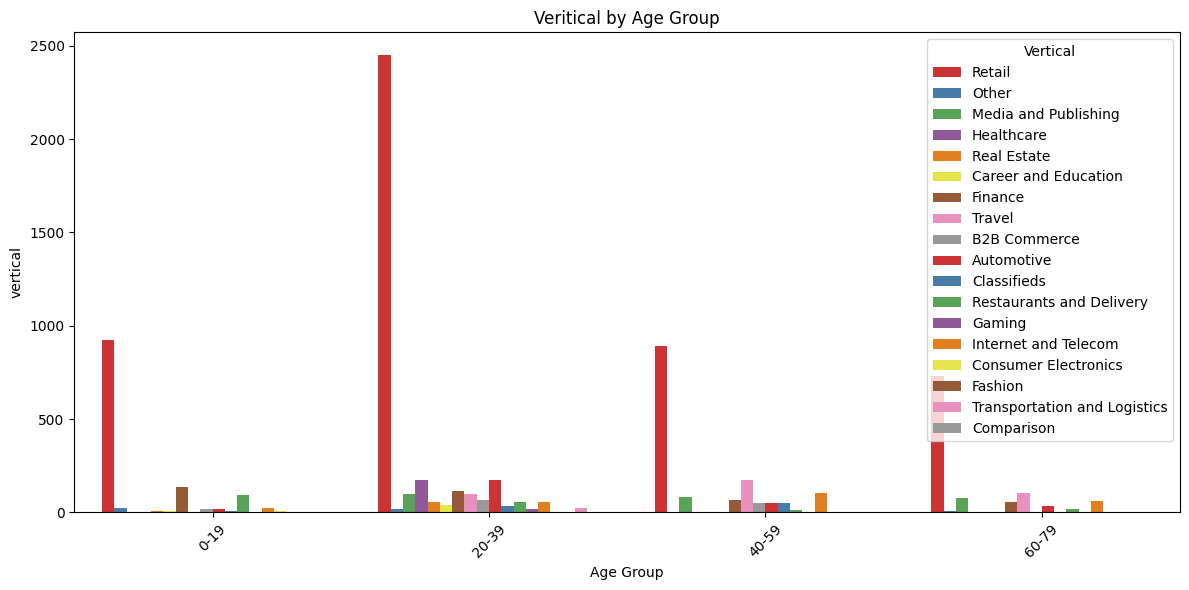

'\ntüm ya gruplarının en çok ilgilendiği sektor retail\n'

In [227]:
### average a göre hangi vertical daha çok bakıcam
### her verticalda  en çok hangi subvertical mevcut yukarıda bakmıştık
plt.figure(figsize=(12, 6))
sns.countplot(x='Age Group', hue='Vertical', data=c1, palette='Set1')
plt.title('Veritical by Age Group')
plt.xlabel('Age Group')
plt.ylabel('vertical')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

"""
tüm ya gruplarının en çok ilgilendiği sektor retail
"""

In [222]:
## en Company Newsletter Interaction Countla-- vertical
###Company Newsletter Interaction  -age a bakıcam
interaction_counts_by_age = c1.groupby(['Age Group', 'Company Newsletter Interaction Count']).size().unstack(fill_value=0)
age_group_totals = interaction_counts_by_age.sum(axis=1)

interaction_percentage_by_age = interaction_counts_by_age.div(age_group_totals, axis=0) * 100
print("interaction_counts_by_age")
print("Yüzdelik Dağılımı:")
"""20 yasa kadar en çok 2 intreacton yapılmış
40a kadar 3 en az
60a kadar 2
sonrası 2
"""

interaction_counts_by_age
Yüzdelik Dağılımı:
Company Newsletter Interaction Count       1.0        2.0        3.0   \
Age Group                                                               
0-19                                   4.511278  71.428571   7.518797   
20-39                                  0.879121  15.824176  29.010989   
40-59                                 12.521739  31.826087   5.913043   
60-79                                 11.526946  25.449102  17.664671   

Company Newsletter Interaction Count       4.0       5.0        6.0   \
Age Group                                                              
0-19                                   0.751880  0.751880  12.030075   
20-39                                 26.593407  6.153846   3.516484   
40-59                                 12.695652  6.260870   0.695652   
60-79                                 18.862275  0.000000  11.077844   

Company Newsletter Interaction Count      7.0       8.0       9.0      10.0  \
Age 

<ipython-input-222-66d148a9c0eb>:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  interaction_counts_by_age = c1.groupby(['Age Group', 'Company Newsletter Interaction Count']).size().unstack(fill_value=0)


'20 yasa kadar en çok 2 intreacton yapılmış\n40a kadar 3 en az\n60a kadar 2\nsonrası 2\n'

In [223]:
# Yaş gruplarındaki toplam kişi sayısını yazdıralım
total_counts_by_age = c1.groupby('Age Group').size()
print("Yaş Grubu Başına Toplam Kişi Sayısı:")
print(total_counts_by_age)

Yaş Grubu Başına Toplam Kişi Sayısı:
Age Group
0-19     1294
20-39    3489
40-59    1495
60-79    1091
dtype: int64


<ipython-input-223-15c8f5cc4c76>:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  total_counts_by_age = c1.groupby('Age Group').size()


In [224]:
# Company Newsletter Interaction Count' ve vertical oranları hesapla
interaction_counts_by_age = c1.groupby(['Vertical', 'Company Newsletter Interaction Count']).size().unstack(fill_value=0)
age_group_totals = interaction_counts_by_age.sum(axis=1)
interaction_percentage_by_age = interaction_counts_by_age.div(age_group_totals, axis=0) * 100
print("Yüzdelik Dağılımı:")
print(interaction_percentage_by_age)
"""
en fazla değilde en yüksek iteraction yapılan mesela 10 iteraction yapanlar  retail sektorunde var
"""

Yüzdelik Dağılımı:
Company Newsletter Interaction Count        1.0         2.0        3.0   \
Vertical                                                                  
Automotive                             18.750000    2.083333  18.750000   
Career and Education                   20.000000   80.000000   0.000000   
Classifieds                             0.000000   77.777778  14.285714   
Comparison                              0.000000    0.000000   0.000000   
Fashion                               100.000000    0.000000   0.000000   
Finance                                 0.000000   36.567164  32.835821   
Gaming                                  0.000000    0.000000  20.000000   
Internet and Telecom                    0.000000    0.000000  22.222222   
Media and Publishing                   40.816327   51.020408   0.000000   
Other                                   4.545455   90.909091   4.545455   
Real Estate                           100.000000    0.000000   0.000000   
Restau

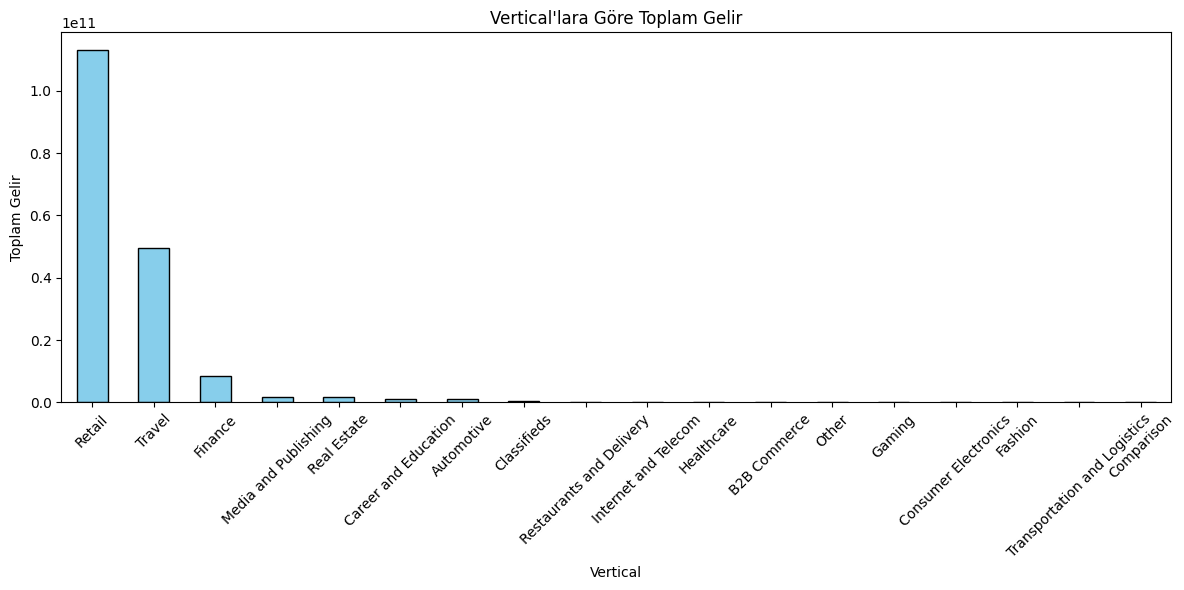

<ipython-input-226-4a6567776116>:26: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


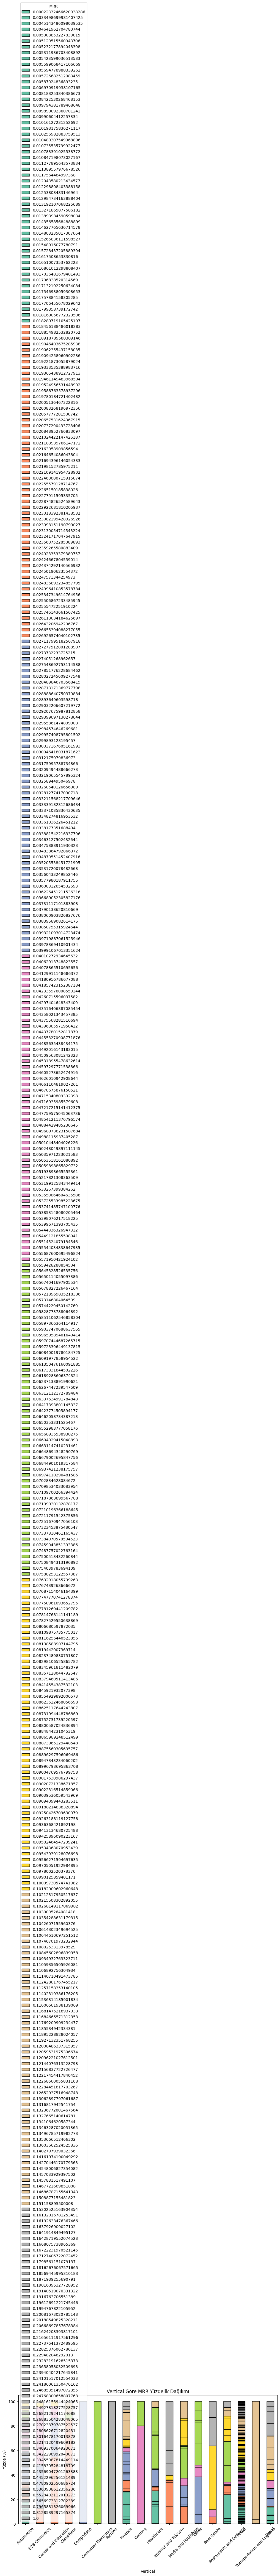

'\nbunları status üstte bakmıstım\nenterprise retained\nsemi-enterprise churn ve hemen hemen retained\nlong-tail churn\n\nen çok kazanan sektor retail\n'

In [226]:
### verticallarin total revenue bakıcam
### verticalların customer level
# Vertical'lara göre toplam gelir
revenue_by_vertical = c1.groupby('Vertical')['Total Revenue'].sum().sort_values(ascending=False)

plt.figure(figsize=(12, 6))
revenue_by_vertical.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Vertical\'lara Göre Toplam Gelir')
plt.xlabel('Vertical')
plt.ylabel('Toplam Gelir')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

#Vertical'lara göre Customer Level Yüzdelik Dağılımı Bar Grafiği:

customer_level_by_vertical = c1.groupby(['Vertical', 'MRR']).size().unstack(fill_value=0)

customer_level_percentage_by_vertical = customer_level_by_vertical.div(customer_level_by_vertical.sum(axis=1), axis=0) * 100

customer_level_percentage_by_vertical.plot(kind='bar', stacked=True, figsize=(12, 6), colormap='Set2', edgecolor='black')
plt.title('Vertical Göre MRR Yüzdelik Dağılımı')
plt.xlabel('Vertical')
plt.ylabel('Yüzde (%)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

"""
bunları status üstte bakmıstım
enterprise retained
semi-enterprise churn ve hemen hemen retained
long-tail churn

en çok kazanan sektor retail
mrr oranı da en çok electronic sektorunde
"""


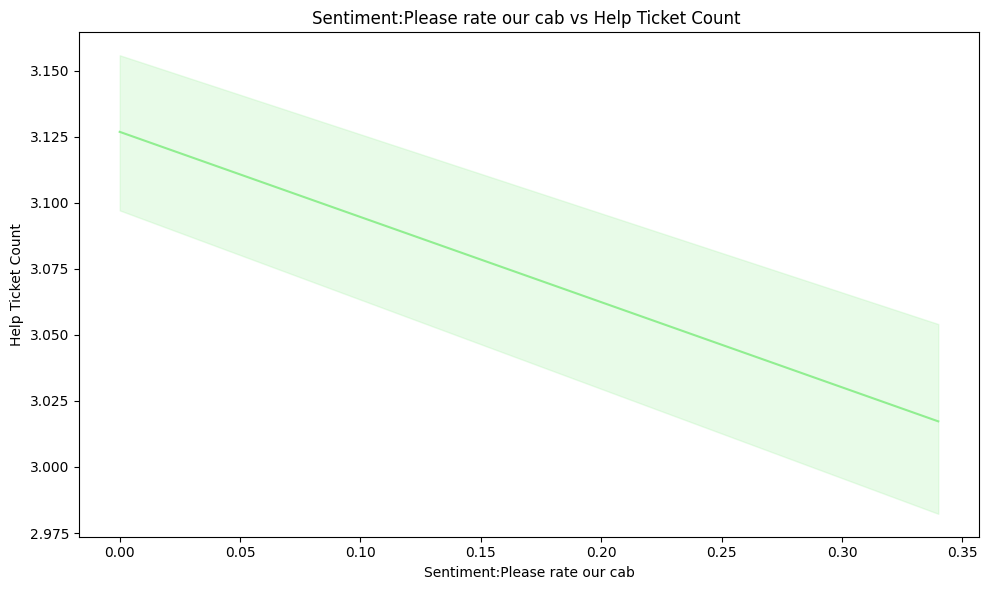

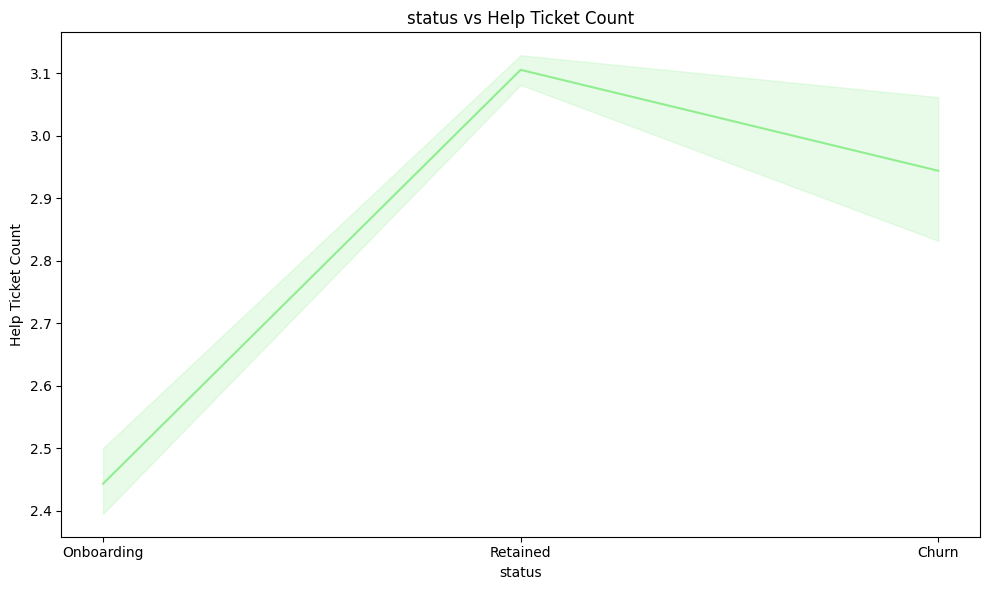

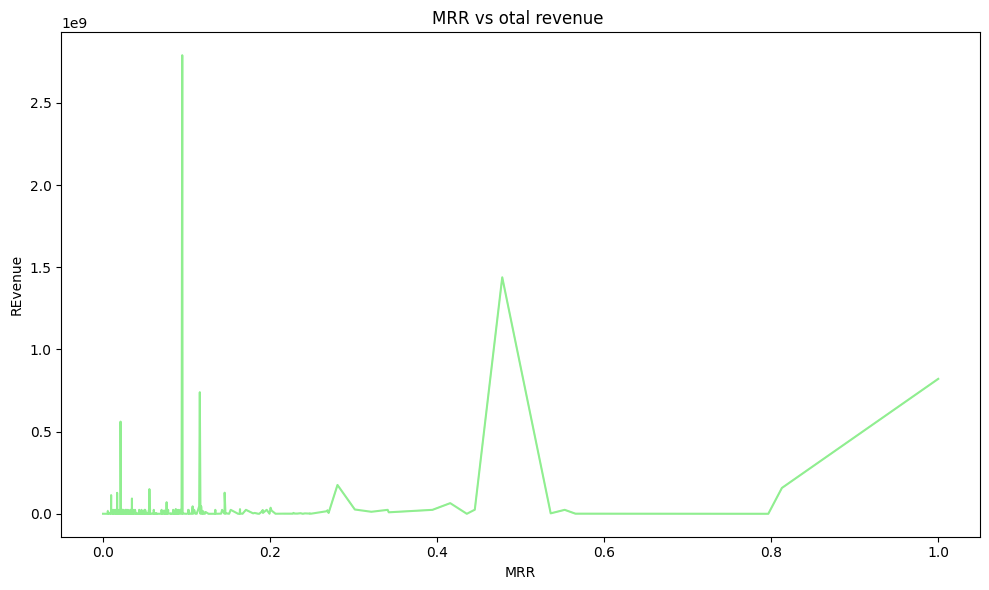

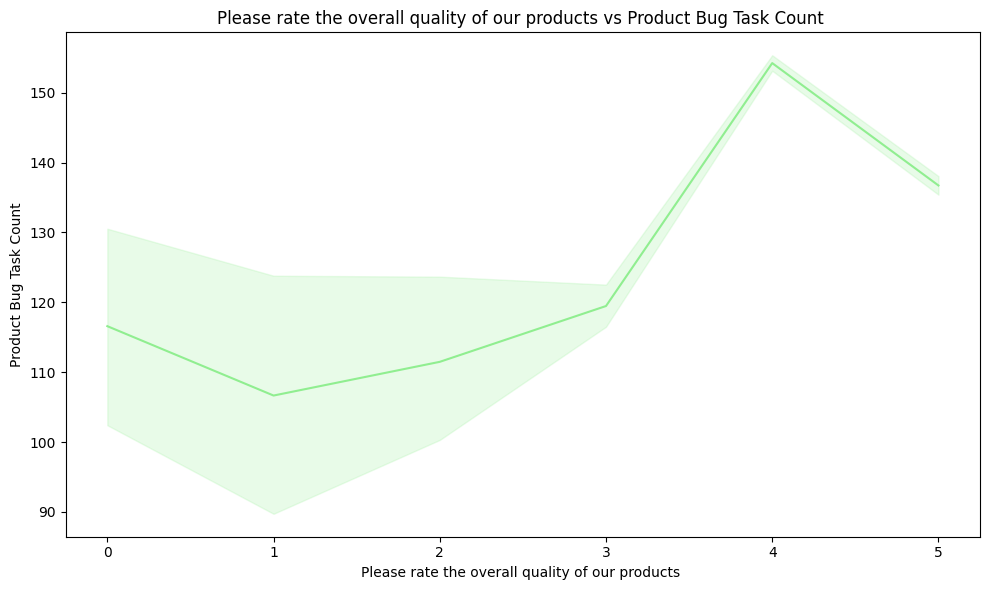

In [246]:


plt.figure(figsize=(10, 6))

sns.lineplot(x='Sentiment:Please rate our cab', y='Help Ticket Count', data=c1, color='lightgreen')
plt.title('Sentiment:Please rate our cab vs Help Ticket Count ')
plt.xlabel('Sentiment:Please rate our cab')
plt.ylabel('Help Ticket Count')
plt.tight_layout()
plt.show()

plt.figure(figsize=(10, 6))

sns.lineplot(x='Status', y='Help Ticket Count', data=c1, color='lightgreen')
plt.title('status vs Help Ticket Count')
plt.xlabel('status')
plt.ylabel('Help Ticket Count')
plt.tight_layout()
plt.show()

plt.figure(figsize=(10, 6))

sns.lineplot(x='MRR', y='Total Revenue', data=c1, color='lightgreen')
plt.title('MRR vs otal revenue ')
plt.xlabel('MRR')
plt.ylabel('REvenue')
plt.tight_layout()
plt.show()

plt.figure(figsize=(10, 6))

sns.lineplot(x='Please rate the overall quality of our products', y='Product Bug Task Count', data=c1, color='lightgreen')
plt.title('Please rate the overall quality of our products vs Product Bug Task Count ')
plt.xlabel('Please rate the overall quality of our products ')
plt.ylabel('Product Bug Task Count')
plt.tight_layout()
plt.show()
#Please rate the overall quality of our products'* ile 'Product Bug Task Count
##help ticket sayısı azıladıkca  Sentiment:Please rate our cab puanı artmış
# retained ve churnlarda help ticket fazla

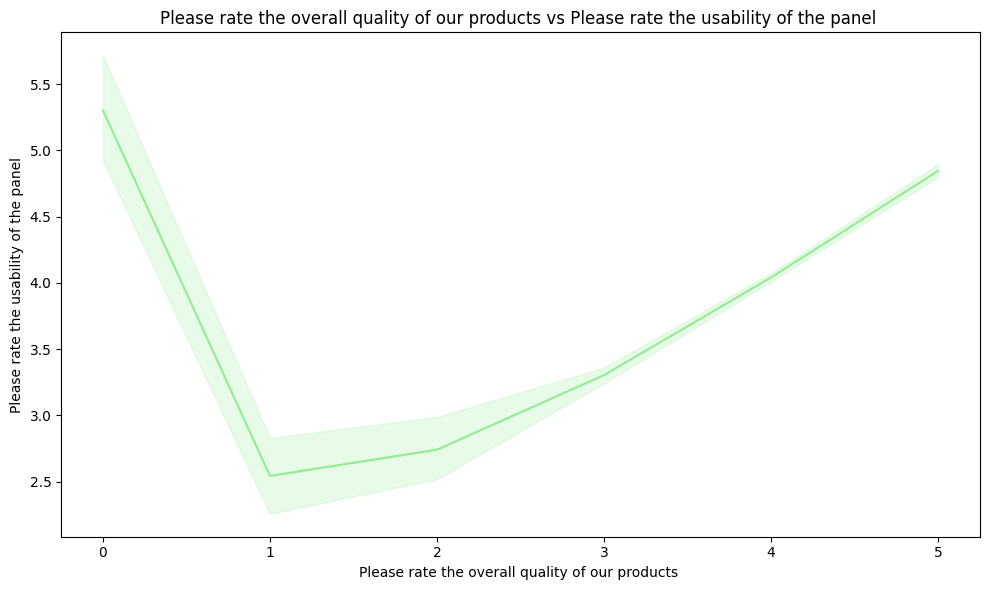

In [247]:
plt.figure(figsize=(10, 6))

sns.lineplot(x='Please rate the overall quality of our products', y='Please rate the usability of the panel', data=c1, color='lightgreen')
plt.title('Please rate the overall quality of our products vs Please rate the usability of the panel ')
plt.xlabel('Please rate the overall quality of our products ')
plt.ylabel('Please rate the usability of the panel')
plt.tight_layout()
plt.show()
# genellemek gerekirse usability arttıkca quality of product artmıl

In [ ]:
#Product Bug Task Count ile Help Ticket Count ilişkisi

plt.figure(figsize=(10, 6))
sns.lineplot(x='Product Bug Task Count', y='Help Ticket Count', data=df, color='lightgreen')
plt.title('Product Bug Task Count vs Help Ticket Count (Line Plot)')
plt.xlabel('Product Bug Task Count')
plt.ylabel('Help Ticket Count')
plt.tight_layout()
plt.show()
##anlamlı bir yorum çıkaramadım suanlık
#"Please rate the usability of the panel ve help ticket

plt.figure(figsize=(10, 6))
sns.lineplot(x=c1["Please rate the usability of the panel"], y='Help Ticket Count', data=df, color='lightgreen')
plt.title('Please rate the usability of the panel vs Help Ticket Count (Line Plot)')
plt.xlabel('Please rate the usability of the panel')
plt.ylabel('Help Ticket Count')
plt.tight_layout()
plt.show()

Yeni gelen müşteriler de çoğunlukla ayda bir kullanıyor. Eğer bu kullanım sıklığı zamanla artmıyorsa, onboarding sürecinin yetersiz olabileceği veya ürünün değer önerisinin net bir şekilde iletilemediği düşünülebilir.
yeni gelen muşterilerin verdiği puana bak??


In [146]:
c1.columns

Index(['Customer ID', 'Year', 'Quarter',
       'How likely are you to recommend insider to a friend or colleague ',
       'How would you rate the value you gain from our company',
       'How frequently are you using our platform',
       'Please rate the overall quality of our products',
       'Please rate the usability of the panel', 'Customer Age (Months)',
       'MRR', 'Total Revenue', 'Help Ticket Count',
       'Help Ticket Lead Time (hours)', 'Company Newsletter Interaction Count',
       'Product Bug Task Count', 'Region', 'Vertical', 'Subvertical', 'Status',
       'Customer Level', 'Response Time', 'Sentiment:Please rate our cab',
       'Response Date', 'Response Dare'],
      dtype='object')

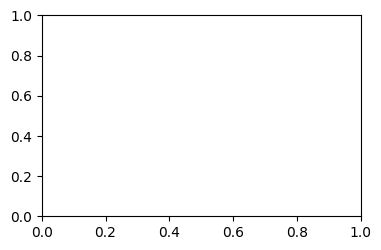

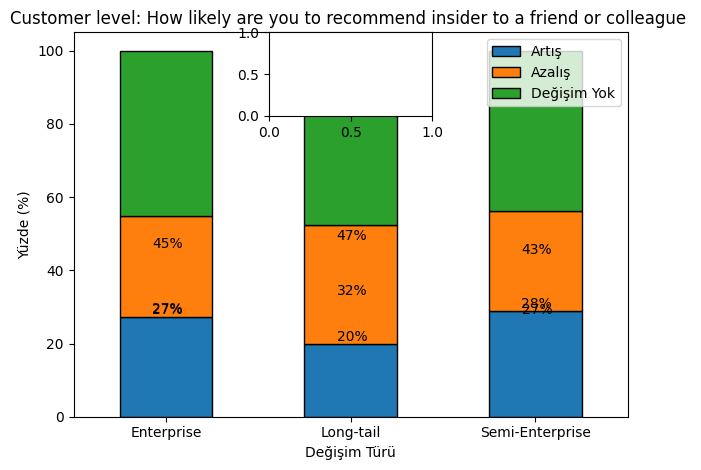

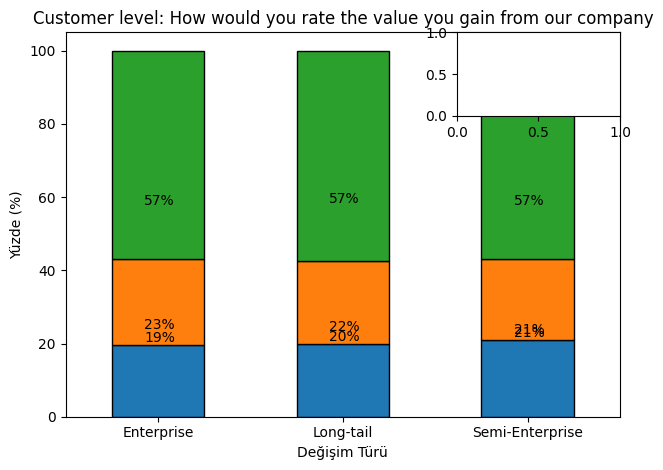

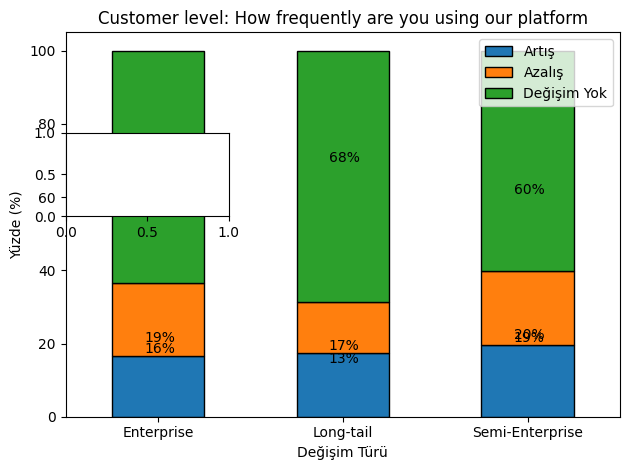

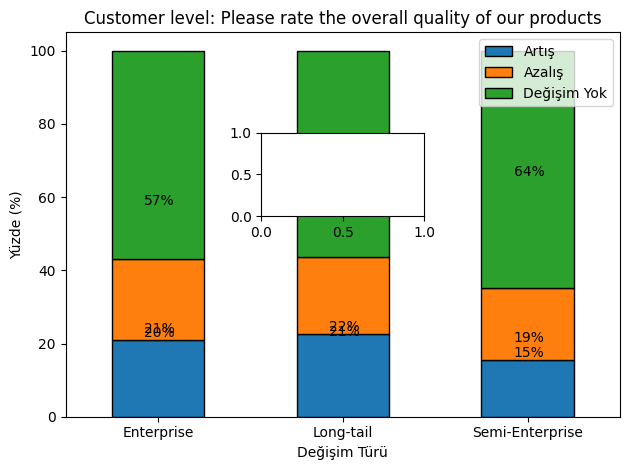

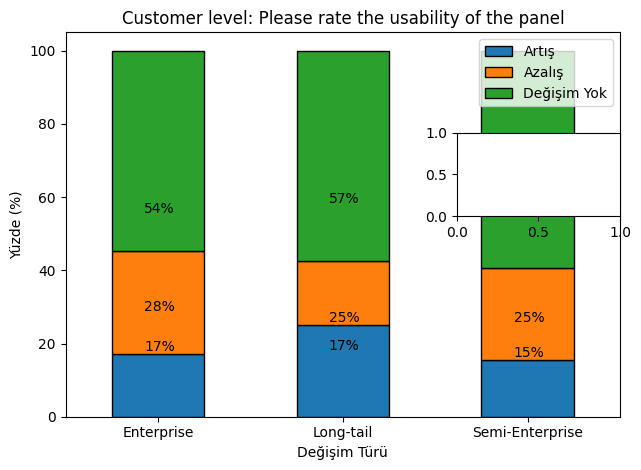

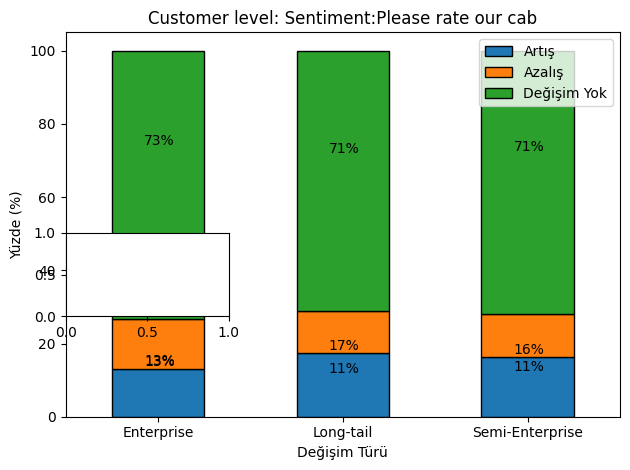

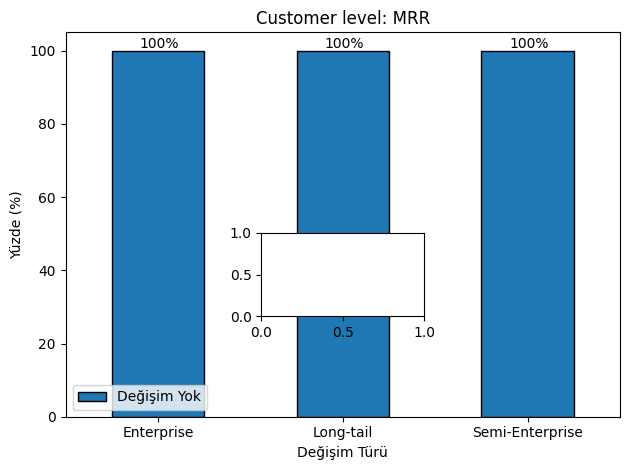

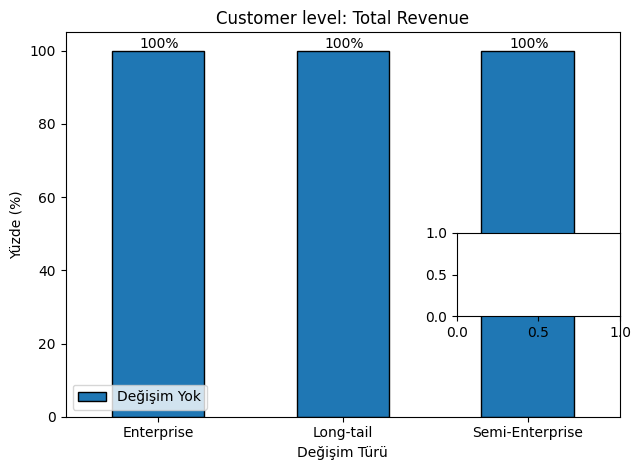

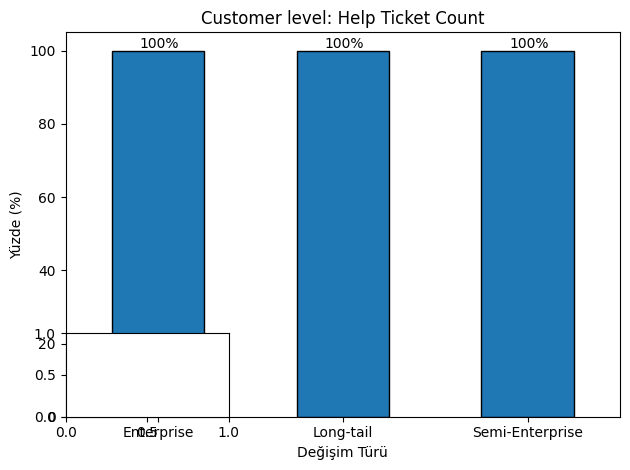

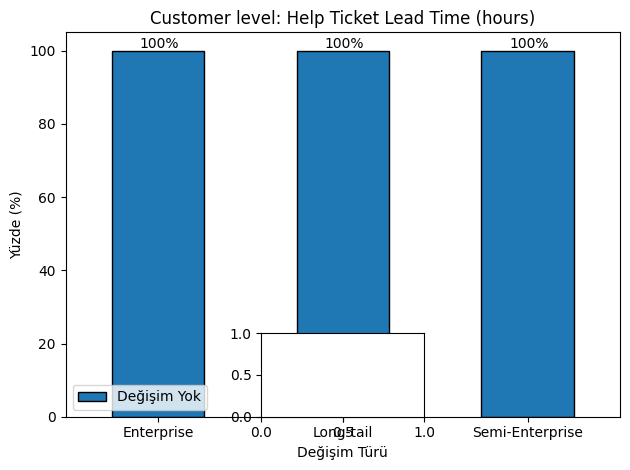

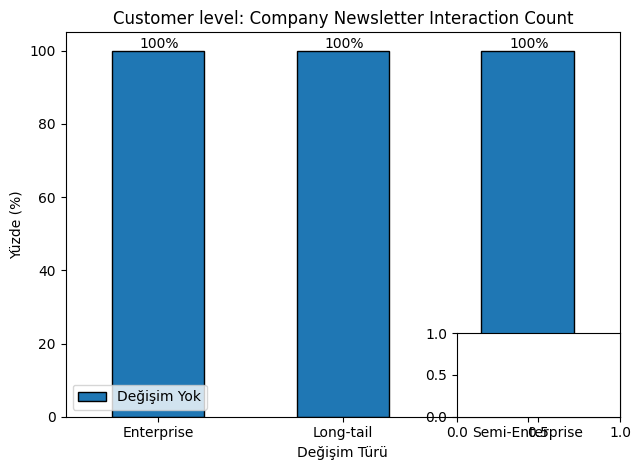

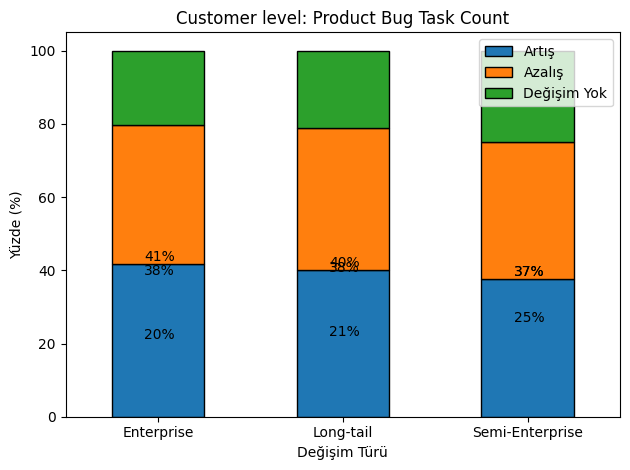

"\nkullanıcıların customer levelerine göre zamanla( responsa date) ile verdikleri puanlar:\n enterprise,  long tail, semi sırasıyla\n'How likely are you to recommend insider to a friend or colleague ', yüzde 45genelde değişmemiş 26 artmıs 28 azamış\n       'How would you rate the value you gain from our company', 57 değişmemil 22 azalmş 20 artmış\n       'How frequently are you using our platform', 63 değişmemiş 17 artmış 18 azalmış\n       'Please rate the overall quality of our products', değişmemils 21 azalmış 19 artmış\n       'Please rate the usability of the panel', değişmemis ya da 25azalmış 17 artmış\n       , 'Company Newsletter Interaction Count', değişmemis 14 artmıs 12 azalmıs\n       'Product Bug Task Count',   EN BELİRGİN BU ARTMIŞ AMA BIRAZI DA AZALMIŞ yüzde 40 artmıs 38 azalmış\n       'Sentiment:Please rate our cab',değişmemis 14 artmış 12 azalmış\n"

In [173]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# k değerinı yukarsa tuttum
df = c1.copy()
df["Response Date"] =k["Response Date"]

# İlgili sütunlar
rating_columns = [
    "How likely are you to recommend insider to a friend or colleague ",
    "How would you rate the value you gain from our company",
    "How frequently are you using our platform",
    "Please rate the overall quality of our products",
    "Please rate the usability of the panel",
    "Sentiment:Please rate our cab",
    "MRR",
    "Total Revenue",
     "Help Ticket Count",
     "Help Ticket Lead Time (hours)",
     "Company Newsletter Interaction Count",
      "Product Bug Task Count"]
change_categories_by_level = {}

for column in rating_columns:
    grouped = df.groupby(["Customer Level", "Customer ID"]).agg({column: ["first", "last"]})
    diff = grouped[column]["first"] - grouped[column]["last"]

    change_categories = diff.apply(lambda x: "Artış" if x < 0 else ("Azalış" if x > 0 else "Değişim Yok"))

    change_categories_by_level[column] = change_categories.groupby("Customer Level").value_counts(normalize=True) * 100
plt.figure(figsize=(14, 12))

for column in rating_columns:
    plt.subplot(4, 3, rating_columns.index(column) + 1)
    counts_percentage = change_categories_by_level[column]

    ax = counts_percentage.unstack().plot(kind="bar", stacked=True, edgecolor="black")
    for p in ax.patches:
        ax.annotate(f'{int(p.get_height())}%',
                    (p.get_x() + p.get_width() / 2., p.get_height()),
                    ha='center', va='center',
                    fontsize=10, color='black',
                    xytext=(1, 5), textcoords='offset points')


    plt.title(f"Customer level: {column}")
    plt.xlabel("Değişim Türü")
    plt.ylabel("Yüzde (%)")
    plt.xticks(rotation=0)
    plt.tight_layout()

plt.show()
#customer age ile yardım isteme oranına bakıcam unutma, prudct task
"""
zamanla  neredeyse değişmemiş çoğunluk
"""

response time- usage frequency- status -customer level ilişkisi üzerine şunları çıkarabilirim:

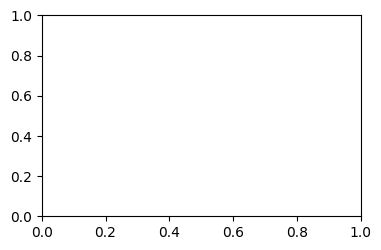

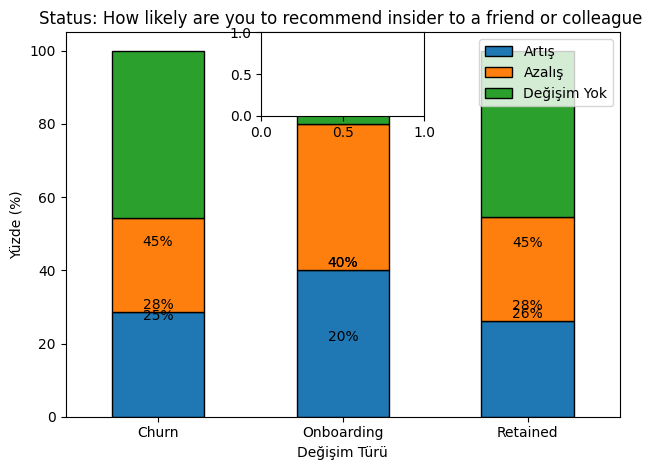

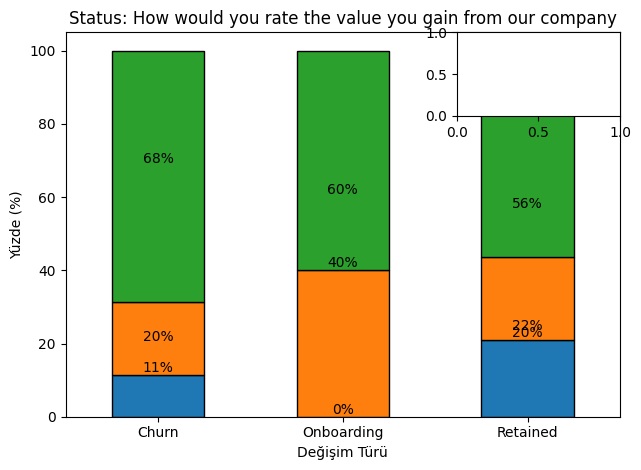

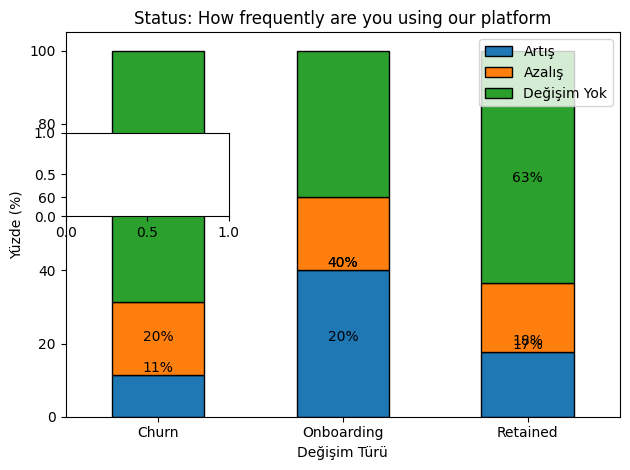

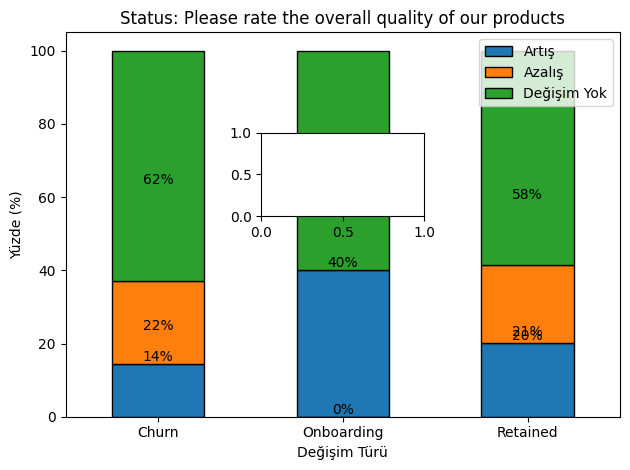

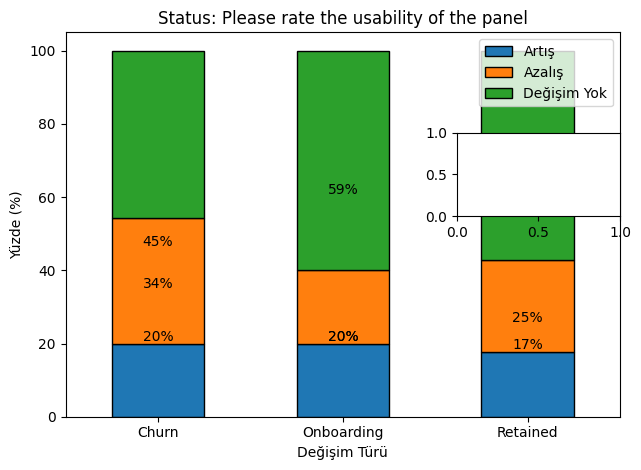

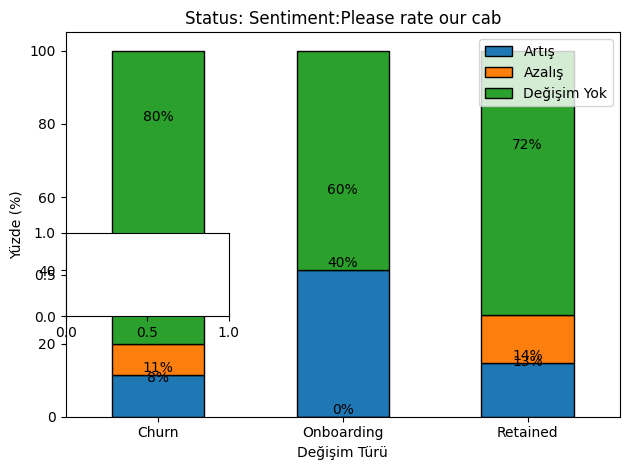

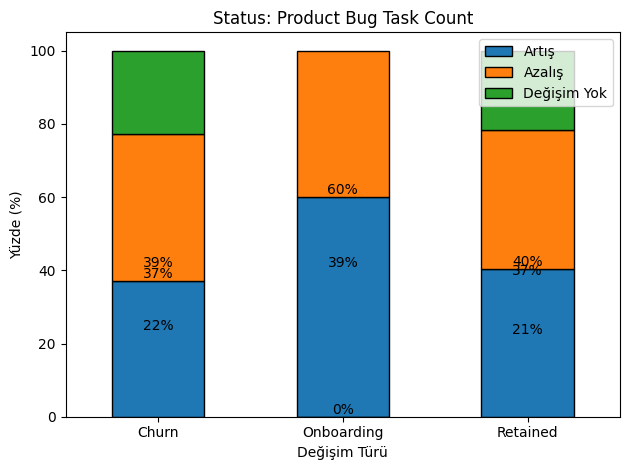

"\nstatuse göre responsa date göre değişim:\n'How likely are you to recommend insider to a friend or colleague ', yüzde 45genelde değişmemiş 26 artmıs 28 azamış\n       'How would you rate the value you gain from our company', 57 değişmemil 22 azalmş 20 artmış\n       'How frequently are you using our platform', 63 değişmemiş 17 artmış 18 azalmış\n       'Please rate the overall quality of our products', değişmemils 21 azalmış 19 artmış\n       'Please rate the usability of the panel', değişmemis ya da 25azalmış 17 artmış\n       , 'Company Newsletter Interaction Count', değişmemis 14 artmıs 12 azalmıs\n       'Product Bug Task Count',   EN BELİRGİN BU ARTMIŞ AMA BIRAZI DA AZALMIŞ yüzde 40 artmıs 38 azalmış\n       'Sentiment:Please rate our cab',değişmemis 14 artmış 12 azalmış\n"

In [168]:
# 'Response Date' sütununun datetime formatına dönüştürülmesi
# k değerinı yukarsa tuttum
df = c1.copy()
df["Response Date"] =k["Response Date"]

# İlgili sütunlar
rating_columns = [
   "How likely are you to recommend insider to a friend or colleague ",
    "How would you rate the value you gain from our company",
    "How frequently are you using our platform",
    "Please rate the overall quality of our products",
    "Please rate the usability of the panel",
    "Sentiment:Please rate our cab",
    "Product Bug Task Count"]

change_categories_by_status = {}

for column in rating_columns:
    grouped = df.groupby(["Status", "Customer ID"]).agg({column: ["first", "last"]})
    diff = grouped[column]["first"] - grouped[column]["last"]

    change_categories = diff.apply(lambda x: "Artış" if x < 0 else ("Azalış" if x > 0 else "Değişim Yok"))

    # Değişim kategorilerini her kullanıcı için 'Status' bazında grupla
    change_categories_by_status[column] = change_categories.groupby("Status").value_counts(normalize=True) * 100
plt.figure(figsize=(14, 12))

for column in rating_columns:
    plt.subplot(4, 3, rating_columns.index(column) + 1)

    # Yüzde hesaplamasını alıyoruz
    counts_percentage = change_categories_by_status[column]


    ax = counts_percentage.unstack().plot(kind="bar", stacked=True, edgecolor="black")
    for p in ax.patches:
        ax.annotate(f'{int(p.get_height())}%',
                    (p.get_x() + p.get_width() / 2., p.get_height()),
                    ha='center', va='center',
                    fontsize=10, color='black',
                    xytext=(0, 5), textcoords='offset points')

    plt.title(f"Status: {column}")
    plt.xlabel("Değişim Türü")
    plt.ylabel("Yüzde (%)")
    plt.xticks(rotation=0)
    plt.tight_layout()

plt.show()
"""
statuse göre responsa date göre değişim:
onobardingte azalmış 'How likely are you to recommend insider to a friend or colleague
onboardingte hiç azalma yok 'How would you rate the value you gain from our company',
       'How frequently are you using our platform',
onboraginte hiç azalmamış'Please rate the overall quality of our products',
       'Please rate the usability of the panel',
       , 'Company Newsletter Interaction Count',
onboaringte,chrunde ve retained de artmış'Product Bug Task Count',   EN BELİRGİN BU ARTMIŞ AMA BIRAZI DA AZALMIŞ yüzde 40 artmıs 38 azalmış
onboardingte hiç azalma yok       'Sentiment:Please rate our cab',
"""

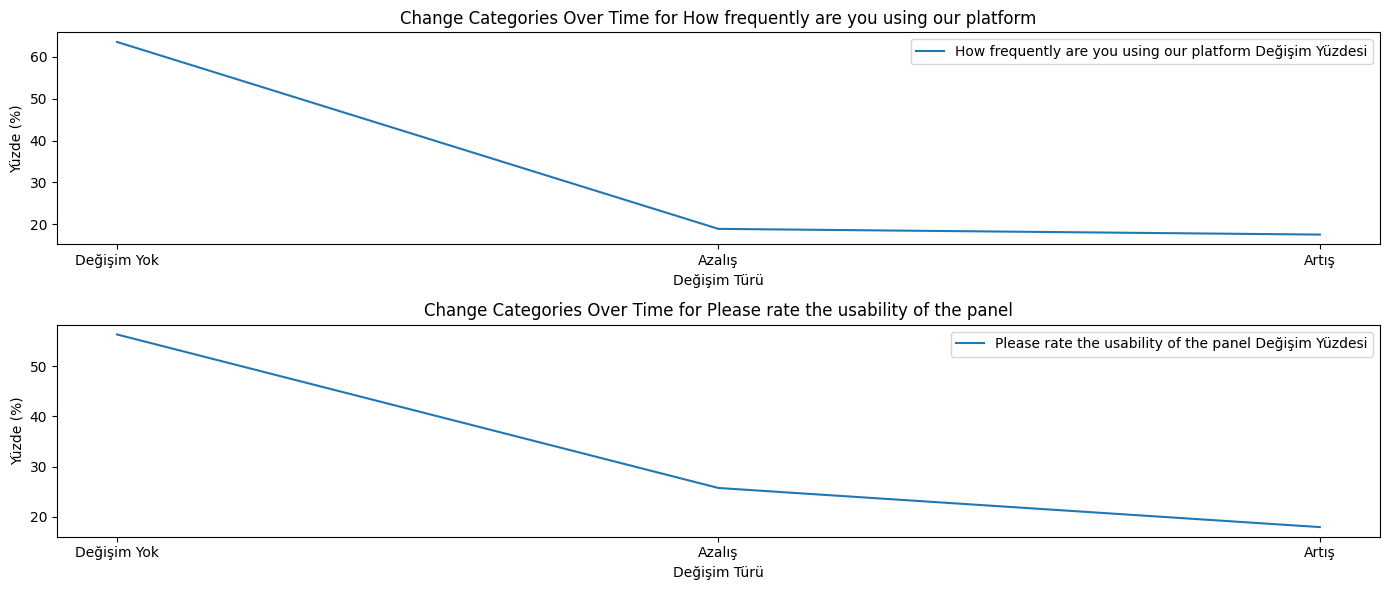

In [236]:
## kullanım sıklığı ile usability rate arasındaki ilişiki
# 'Response Date' sütununun datetime formatına dönüştürülmesi
# k değerinı yukarsa tuttum
# Yedek df oluşturuluyor
df = c1.copy()
df["Response Date"] = k["Response Date"]

# İlgili sütunlar
rating_columns = [
    "How frequently are you using our platform",
    "Please rate the usability of the panel"]

change_categories_by_status = {}

# Değişim kategorilerini hesaplama
for column in rating_columns:
    grouped = df.groupby(["Customer ID"]).agg({column: ["first", "last"]})
    diff = grouped[column]["first"] - grouped[column]["last"]

    # Değişim kategorisini oluşturma
    change_categories = diff.apply(lambda x: "Artış" if x < 0 else ("Azalış" if x > 0 else "Değişim Yok"))

    change_categories_by_status[column] = change_categories.value_counts(normalize=True) * 100

# Çizgi grafiği (lineplot) çizimi
plt.figure(figsize=(14, 6))

for column in rating_columns:
    plt.subplot(2, 1, rating_columns.index(column) + 1)

    # Yüzde hesaplamasını alıyoruz
    counts_percentage = change_categories_by_status[column]

    # Çizgi grafiği
    sns.lineplot(x=counts_percentage.index, y=counts_percentage.values, label=f'{column} Değişim Yüzdesi')

    plt.title(f"Change Categories Over Time for {column}")
    plt.xlabel("Değişim Türü")
    plt.ylabel("Yüzde (%)")
    plt.xticks(rotation=0)
    plt.tight_layout()

plt.show()


In [199]:
c1.columns

Index(['Customer ID', 'Year', 'Quarter',
       'How likely are you to recommend insider to a friend or colleague ',
       'How would you rate the value you gain from our company',
       'How frequently are you using our platform',
       'Please rate the overall quality of our products',
       'Please rate the usability of the panel', 'Customer Age (Months)',
       'MRR', 'Total Revenue', 'Help Ticket Count',
       'Help Ticket Lead Time (hours)', 'Company Newsletter Interaction Count',
       'Product Bug Task Count', 'Region', 'Vertical', 'Subvertical', 'Status',
       'Customer Level', 'Response Time', 'Sentiment:Please rate our cab',
       'Response Date', 'Response Dare', 'Age Group'],
      dtype='object')

In [ ]:
c.to_csv("/content/dffinal-c.csv", index=False)

In [ ]:
"""
ÇIKARDIĞIM BİLGİLER BURDA DURSUN YORUMLUCAM
Enterprise Müşteriler:Retained Oranı: %57.7 ve günde bir kez kullanıyor
Semi-Enterprise Müşteriler:Churn Oranı: %43.3,Retained Oranı: %42.1,genelde ayda bir kez kullanıyolar
Long-tail Müşteriler:Churn Oranı: %72.4, genede ayda bir kez kullanıyolar LONG TAİL MÜSTERİLER NEDEN DAHA ÇOK CHURN OLUYOR VE NAPILABİLİR
Yaş Grupları ve Platform Frekansı: Genç yaş gruplarında (20-39 yaş) platform frekansı daha yüksektir ve bu grupta çoğunlukla Enterprise müşteriler ve en fazla retained olanlar yer alır.
Help Ticket Count ve Lead Time:
Retained müşterilerde help ticket count en fazla ve lead time ortalama düzeydedir.
Onboarding sürecindeki müşterilerin help ticket count'u en az, fakat lead time'ı en yüksektir.
Churn olan müşterilerin help ticket count'u retained'lerden biraz daha azdır, ancak lead time en düşüktür.
en çok kazanan sektor retaiL, en çok newsletter interaction countta retail sektorunde
Enterprise en çok retailda.
mrr oranı da en çok electronic sektorunde
help ticket sayısı azıladıkca  Sentiment:Please rate our cab puanı artmış
retained ve churnlarda help ticket fazla
 genelde product task bug da yükseldikce quality of product ratede yüksek??
insanlar ürünü kaliteli bulduklarında ve aldığı değeri yüksek gördüklerinde, panelin kullanılabilirliğini de daha yüksek puanlama eğilimindeler.

"""

#çıkarımlar ve iş çözcümü önerilerim



1)Long-tail müşteriler en yüksek churn oranına (%72.4) sahip ve genellikle ayda bir kez kullanıyorlar. Kullanım sıklıkları düşük olduğu için ürüne bağlılık geliştiremiyor olabilirler. Long-tail müşterilere özel promosyonlar etkileşim artırıcı kampanyalar sunulabilir ve neden ayrıldıklarını anlamak için churn surveyleri uygulanabilir.Kullanım Alışkanlığı Oluşturmak için gamification, ödüller veya özel bildirimler eklenebilir.


2)Onboarding Sürecinin İyileştirilmesi, Help ticket count'ları düşük, ancak lead time en yüksek. Bu da onların erken aşamada sorun yaşadıklarını ama destek sürecinin onları tatmin etmediğini gösteriyor. Daha hızlı destek veya otomatik rehber sistemleri eklenebilir.Kullanım Alışkanlığı Oluşturma: Kullanım sıklığını artırmak için gamification, ödüller veya özel bildirimler eklenebilir.


3)MRR oranı en çok elektronik sektöründe.Elektronik sektörü daha fazla ödeme yapmaya yatkın.Enterprise seviyesinde elektronik firmalarını hedefleyen yeni kampanyalar oluşturulabilir.


4)Toplam gelir ve newsletter interaction count en çok retail sektöründe. Retail müşterileri bültenlerle daha fazla etkileşimde, bu müşteri etkileşimi ile gelir arasında doğrudan bir bağlantı olabileceğini gösteriyor
Diğer sektörlerde de newsletter stratejisini güçlendirmek için bültenleri kişiselleştirme ve etkileşimde bulunan müşterilere özel teklifler sunma gibi stratejiler geliştirilebilir


5)Help ticket count azaldıkça müşteri memnuniyeti (Sentiment puanı) artıyor.Destek Sürecini Geliştirmek için AI destekli chatbotlar veya self-service destek çözümleri eklenebilir.Retained müşterilerde help ticket count en fazla ve lead time ortalama düzeyde.Retained müşterilerin ürünü aktif olarak kullandığını ve sorun yaşadıklarında destek aldıklarını gösteriyor.Retained müşterilerin destek taleplerini analiz edip, sık karşılaşılan sorunlar için otomatik çözüm önerileri sunulabilir. Churn olan müşterilerin help ticket count'u retained müşterilerden biraz daha az, ancak lead time en düşük. Help ticket count'u az olmasına rağmen churn riski olan müşteriler tespit edilerek, özel destek ve teşvikler sunulduğu düşünülebilir


6)Product Bug Task sayısı arttıkça, ürün kalitesine verilen puan da yükseliyor.Geliştirme süreçlerini şeffaf hale getirmek yaniHata çözümlerini ve güncellemeleri daha görünür hale getirecek bir "Product Update" bölümü eklenebilir.Ürünü geliştirmeye yönelik kullanıcı geri bildirimleri, müşteri memnuniyetini doğrudan artırabilir. Bir " Request" formu oluşturulabilir.




7)Genç Müşteriler (20-39 Yaş) platformu daha sık kullanıyor ve retained oranı daha yüksek.Genellikle Enterprise müşteri kategorisinde yer alıyorlar.Ancak, daha yaşlı müşterilerin kullanım sıklığı ve retained olma eğilimi nispeten daha düşük. 40+ yaş grubu teknolojiye daha az aşina olduğu için, daha yaşlı müşterilere özel onboarding sürecini güçlendiricek  daha basit, rehberli arayüzler veya kullanım kolaylığı artıran özellikler sunulabilir.


8)İnsanlar ürünü kaliteli bulduklarında ve aldığı değeri yüksek gördüklerinde, panelin kullanılabilirliğini de daha yüksek puanlama eğilimindeler.Kullanıcıya özel demo ve kullanım örnekleri sunarak platformu ve ürün değerini anlatmak.


9)Yeni Gelenlerin Response Süresi(survey data ve response datein arasındaki faarkı buldum) daha kısa,ilk aşamada platformla ilgili izlenimleri daha taze olduğu için hızla yanıt veriyor olabilirler.Retained Kullanıcıların Response Süresi en fazla,Bu grup platformu sık kullandığı için detaylı geri bildirim verebilir.Uzun süreli müşteriler olduğu için beklentileri ve değerlendirme süreci daha detaylı olabilir.
